In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import requests
import json
import pysam
from Bio import SeqIO

In [2]:
ctc_vcf = pd.read_csv('HaplotypeCaller/Ctrls/CTC_merged_RG/CTC_merged_RG.vcf', comment='#', sep='\t', header=None)
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE']
ctc_vcf.columns = columns
ctc_vcf.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE
0,chr10,3101193,.,C,A,58.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-3.190e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:6,2:8:66:0|1:3101193_C_A:66,0,205:3101193"
1,chr10,3101200,.,T,C,58.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-4.310e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:6,2:8:66:0|1:3101193_C_A:66,0,205:3101193"
2,chr10,3101233,.,G,A,64.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-4.310e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:4,2:6:72:0|1:3101233_G_A:72,0,162:3101233"
3,chr10,3101242,.,TAA,T,64.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;DP=6;Exce...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:4,2:6:72:0|1:3101233_G_A:72,0,162:3101233"
4,chr10,3101284,.,C,T,55.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-6.190e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:7,2:9:63:0|1:3101284_C_T:63,0,276:3101284"


In [3]:
wbc_vcf = pd.read_csv('HaplotypeCaller/Ctrls/WBC_merged_RG/WBC_merged_RG.vcf', comment='#', sep='\t', header=None)
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE']
wbc_vcf.columns = columns
wbc_vcf.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE
0,chr10,3100353,.,T,A,39.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=2.08;DP=16;Exc...,GT:AD:DP:GQ:PL,"0/1:12,2:15:47:47,0,396"
1,chr10,3101309,.,A,T,32.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-9.670e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:1,2:3:36:40,0,36"
2,chr10,3101422,.,TC,T,55.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;DP=4;Exce...,GT:AD:DP:GQ:PL,"0/1:2,2:4:63:63,0,63"
3,chr10,3101515,.,AT,A,34.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-8.120e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:7,2:9:42:42,0,208"
4,chr10,3102600,.,C,CTCCACACTACCTCAA,34.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=3.15;DP=21;Exc...,GT:AD:DP:GQ:PL,"0/1:17,3:20:42:42,0,705"


In [4]:
wbc_vcf['mutid'] = wbc_vcf['CHROM'].astype(str) + ':' + wbc_vcf['POS'].astype(str) + ':' + wbc_vcf['REF'] + ':' + wbc_vcf['ALT']
ctc_vcf['mutid'] = ctc_vcf['CHROM'].astype(str) + ':' + ctc_vcf['POS'].astype(str) + ':' + ctc_vcf['REF'] + ':' + ctc_vcf['ALT']

In [5]:
wbc_vcf.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid
0,chr10,3100353,.,T,A,39.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=2.08;DP=16;Exc...,GT:AD:DP:GQ:PL,"0/1:12,2:15:47:47,0,396",chr10:3100353:T:A
1,chr10,3101309,.,A,T,32.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-9.670e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:1,2:3:36:40,0,36",chr10:3101309:A:T
2,chr10,3101422,.,TC,T,55.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;DP=4;Exce...,GT:AD:DP:GQ:PL,"0/1:2,2:4:63:63,0,63",chr10:3101422:TC:T
3,chr10,3101515,.,AT,A,34.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-8.120e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:7,2:9:42:42,0,208",chr10:3101515:AT:A
4,chr10,3102600,.,C,CTCCACACTACCTCAA,34.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=3.15;DP=21;Exc...,GT:AD:DP:GQ:PL,"0/1:17,3:20:42:42,0,705",chr10:3102600:C:CTCCACACTACCTCAA


In [6]:
ctc_vcf.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid
0,chr10,3101193,.,C,A,58.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-3.190e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:6,2:8:66:0|1:3101193_C_A:66,0,205:3101193",chr10:3101193:C:A
1,chr10,3101200,.,T,C,58.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-4.310e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:6,2:8:66:0|1:3101193_C_A:66,0,205:3101193",chr10:3101200:T:C
2,chr10,3101233,.,G,A,64.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-4.310e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:4,2:6:72:0|1:3101233_G_A:72,0,162:3101233",chr10:3101233:G:A
3,chr10,3101242,.,TAA,T,64.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;DP=6;Exce...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:4,2:6:72:0|1:3101233_G_A:72,0,162:3101233",chr10:3101242:TAA:T
4,chr10,3101284,.,C,T,55.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-6.190e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:7,2:9:63:0|1:3101284_C_T:63,0,276:3101284",chr10:3101284:C:T


In [10]:
wbc_mutations = set(wbc_vcf['mutid'])
ctc_mutations = set(ctc_vcf['mutid'])

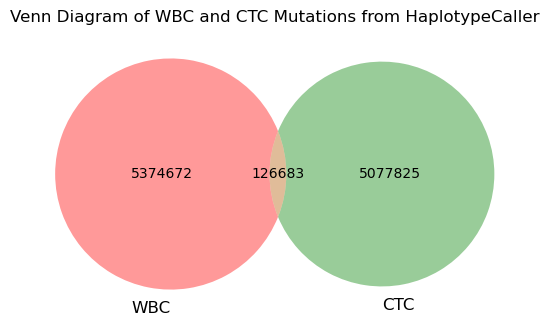

In [59]:
venn2([wbc_mutations, ctc_mutations], ('WBC', 'CTC'))
plt.title('Venn Diagram of WBC and CTC Mutations from HaplotypeCaller')
plt.show()

In [11]:
ctc_vcf['FORMAT'].unique()

array(['GT:AD:DP:GQ:PGT:PID:PL:PS', 'GT:AD:DP:GQ:PL'], dtype=object)

In [13]:
exclusive_wbc = wbc_mutations - ctc_mutations
exclusive_ctc = ctc_mutations - wbc_mutations
common_mutations = wbc_mutations & ctc_mutations

In [14]:
print('Common Mutations:', len(common_mutations))
print('Exclusive CTC:', len(exclusive_ctc))
print('Exclusive WBC:', len(exclusive_wbc))

Common Mutations: 126683
Exclusive CTC: 5077825
Exclusive WBC: 5374672


In [21]:
5077825+126683

5204508

In [15]:
exclusive_wbc_df = wbc_vcf[wbc_vcf['mutid'].isin(exclusive_wbc)]
print(exclusive_wbc_df.shape[0])
exclusive_wbc_df.head()

5374672


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid
0,chr10,3100353,.,T,A,39.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=2.08;DP=16;Exc...,GT:AD:DP:GQ:PL,"0/1:12,2:15:47:47,0,396",chr10:3100353:T:A
1,chr10,3101309,.,A,T,32.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-9.670e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:1,2:3:36:40,0,36",chr10:3101309:A:T
2,chr10,3101422,.,TC,T,55.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;DP=4;Exce...,GT:AD:DP:GQ:PL,"0/1:2,2:4:63:63,0,63",chr10:3101422:TC:T
3,chr10,3101515,.,AT,A,34.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-8.120e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:7,2:9:42:42,0,208",chr10:3101515:AT:A
4,chr10,3102600,.,C,CTCCACACTACCTCAA,34.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=3.15;DP=21;Exc...,GT:AD:DP:GQ:PL,"0/1:17,3:20:42:42,0,705",chr10:3102600:C:CTCCACACTACCTCAA


In [16]:
exclusive_ctc_df = ctc_vcf[ctc_vcf['mutid'].isin(exclusive_ctc)]
print(exclusive_ctc_df.shape[0])
exclusive_ctc_df.head()

5077825


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid
0,chr10,3101193,.,C,A,58.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-3.190e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:6,2:8:66:0|1:3101193_C_A:66,0,205:3101193",chr10:3101193:C:A
1,chr10,3101200,.,T,C,58.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-4.310e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:6,2:8:66:0|1:3101193_C_A:66,0,205:3101193",chr10:3101200:T:C
2,chr10,3101233,.,G,A,64.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-4.310e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:4,2:6:72:0|1:3101233_G_A:72,0,162:3101233",chr10:3101233:G:A
3,chr10,3101242,.,TAA,T,64.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;DP=6;Exce...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:4,2:6:72:0|1:3101233_G_A:72,0,162:3101233",chr10:3101242:TAA:T
4,chr10,3101284,.,C,T,55.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-6.190e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:7,2:9:63:0|1:3101284_C_T:63,0,276:3101284",chr10:3101284:C:T


In [17]:
common_df = ctc_vcf[ctc_vcf['mutid'].isin(common_mutations)]
print(common_df.shape[0])
common_df.head()

126683


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid
12,chr10,3103391,.,CT,C,259.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.374e+00;DP=...,GT:AD:DP:GQ:PL,"0/1:13,11:26:99:267,0,271",chr10:3103391:CT:C
33,chr10,3123260,.,G,T,55.64,.,AC=1;AF=0.500;AN=2;DP=5;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"0/1:2,2:4:63:63,0,79",chr10:3123260:G:T
67,chr10,3134142,.,T,C,121.84,.,AC=2;AF=1.00;AN=2;DP=3;ExcessHet=3.0103;FS=0.0...,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,3:3:9:1|1:3134142_T_C:135,9,0:3134142",chr10:3134142:T:C
68,chr10,3134157,.,C,A,78.32,.,AC=2;AF=1.00;AN=2;DP=2;ExcessHet=3.0103;FS=0.0...,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,2:2:6:1|1:3134142_T_C:90,6,0:3134142",chr10:3134157:C:A
71,chr10,3134395,.,A,G,841.06,.,AC=2;AF=1.00;AN=2;DP=19;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,19:19:57:1|1:3134395_A_G:855,57,0:3134395",chr10:3134395:A:G


In [18]:
exclusive_wbc_df['genotype'] = exclusive_wbc_df['SAMPLE'].str.split(':').str[0]
exclusive_ctc_df['genotype'] = exclusive_ctc_df['SAMPLE'].str.split(':').str[0]
common_df['genotype'] = common_df['SAMPLE'].str.split(':').str[0]

/var/folders/1r/2rdl7f4j0jbbvz41q1pc2bv40000gp/T/ipykernel_62997/1353408361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exclusive_wbc_df['genotype'] = exclusive_wbc_df['SAMPLE'].str.split(':').str[0]
/var/folders/1r/2rdl7f4j0jbbvz41q1pc2bv40000gp/T/ipykernel_62997/1353408361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exclusive_ctc_df['genotype'] = exclusive_ctc_df['SAMPLE'].str.split(':').str[0]
/var/folders/1r/2rdl7f4j0jbbvz41q1pc2bv40000gp/T/ipykernel_62997/1353408361.py:3: SettingWithCop

In [21]:
exclusive_wbc_df['DP'] = exclusive_wbc_df['SAMPLE'].str.split(':').str[2].astype(float)
exclusive_wbc_df_filtered = exclusive_wbc_df[exclusive_wbc_df['DP'] > 10]
exclusive_wbc_df_filtered_snvs = exclusive_wbc_df_filtered[(exclusive_wbc_df_filtered['REF'].str.len() == 1) & (exclusive_wbc_df_filtered['ALT'].str.len() == 1)]
exclusive_wbc_df_filtered_snvs.head()

/var/folders/1r/2rdl7f4j0jbbvz41q1pc2bv40000gp/T/ipykernel_62997/2416395294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exclusive_wbc_df['DP'] = exclusive_wbc_df['SAMPLE'].str.split(':').str[2].astype(float)


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
0,chr10,3100353,.,T,A,39.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=2.08;DP=16;Exc...,GT:AD:DP:GQ:PL,"0/1:12,2:15:47:47,0,396",chr10:3100353:T:A,0/1,15.0
6,chr10,3104885,.,G,T,42.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=1.48;DP=14;Exc...,GT:AD:DP:GQ:PL,"0/1:11,2:13:50:50,0,414",chr10:3104885:G:T,0/1,13.0
7,chr10,3107117,.,G,A,46.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.967e+00;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:10,2:12:54:0|1:3107093_C_G:54,0,408:3107093",chr10:3107117:G:A,0|1,12.0
14,chr10,3119565,.,G,A,31.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.367e+00;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:15,2:17:39:1|0:3119553_G_A:39,0,624:3119553",chr10:3119565:G:A,0|1,17.0
15,chr10,3120554,.,C,T,51.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.510e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:51,7:58:59:59,0,1672",chr10:3120554:C:T,0/1,58.0


In [23]:
exclusive_ctc_df['DP'] = exclusive_ctc_df['SAMPLE'].str.split(':').str[2].astype(float)
exclusive_ctc_df_filtered = exclusive_ctc_df[exclusive_ctc_df['DP'] > 10]
exclusive_ctc_df_filtered_snvs = exclusive_ctc_df_filtered[(exclusive_ctc_df_filtered['REF'].str.len() == 1) & (exclusive_ctc_df_filtered['ALT'].str.len() == 1)]
exclusive_ctc_df_filtered_snvs.head()

/var/folders/1r/2rdl7f4j0jbbvz41q1pc2bv40000gp/T/ipykernel_62997/3973115178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exclusive_ctc_df['DP'] = exclusive_ctc_df['SAMPLE'].str.split(':').str[2].astype(float)


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
7,chr10,3101761,.,A,C,46.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.139e+00;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:10,2:12:54:0|1:3101761_A_C:54,0,383:3101761",chr10:3101761:A:C,0|1,12.0
8,chr10,3101766,.,G,A,46.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.128e+00;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:10,2:12:54:0|1:3101761_A_C:54,0,383:3101761",chr10:3101766:G:A,0|1,12.0
9,chr10,3101888,.,G,A,48.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.145e+00;DP=...,GT:AD:DP:GQ:PL,"0/1:10,3:13:56:56,0,354",chr10:3101888:G:A,0/1,13.0
10,chr10,3102601,.,C,T,34.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=1.28;DP=18;Exc...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:14,2:17:42:0|1:3102601_C_T:42,0,582:3102601",chr10:3102601:C:T,0|1,17.0
15,chr10,3106115,.,C,T,37.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-6.110e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:13,2:15:45:0|1:3106108_T_A:45,0,520:3106108",chr10:3106115:C:T,0|1,15.0


In [24]:
common_df['DP'] = common_df['SAMPLE'].str.split(':').str[2].astype(float)
common_df_filtered = common_df[common_df['DP'] > 10]
common_df_filtered_snvs = common_df_filtered[(common_df_filtered['REF'].str.len() == 1) & (common_df_filtered['ALT'].str.len() == 1)]
common_df_filtered_snvs.head()

/var/folders/1r/2rdl7f4j0jbbvz41q1pc2bv40000gp/T/ipykernel_62997/465872635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_df['DP'] = common_df['SAMPLE'].str.split(':').str[2].astype(float)


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
71,chr10,3134395,.,A,G,841.06,.,AC=2;AF=1.00;AN=2;DP=19;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,19:19:57:1|1:3134395_A_G:855,57,0:3134395",chr10:3134395:A:G,1|1,19.0
72,chr10,3134396,.,C,T,841.06,.,AC=2;AF=1.00;AN=2;DP=19;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,19:19:57:1|1:3134395_A_G:855,57,0:3134395",chr10:3134396:C:T,1|1,19.0
73,chr10,3134517,.,G,A,1070.06,.,AC=2;AF=1.00;AN=2;DP=25;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,25:25:75:1|1:3134517_G_A:1084,75,0:3134517",chr10:3134517:G:A,1|1,25.0
74,chr10,3134540,.,A,G,1065.06,.,AC=2;AF=1.00;AN=2;DP=24;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,24:24:72:1|1:3134517_G_A:1079,72,0:3134517",chr10:3134540:A:G,1|1,24.0
75,chr10,3134695,.,C,G,762.06,.,AC=2;AF=1.00;AN=2;DP=21;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,20:20:60:776,60,0",chr10:3134695:C:G,1/1,20.0


In [25]:
exclusive_wbc_df_filtered_snvs.genotype.unique()

array(['0/1', '0|1', '1/1', '1|1'], dtype=object)

In [26]:
exclusive_ctc_df_filtered_snvs.genotype.unique()

array(['0|1', '0/1', '1/1', '1|1'], dtype=object)

In [27]:
common_df_filtered_snvs.genotype.unique()

array(['1|1', '1/1', '0/1', '0|1'], dtype=object)

### Heterozygous

In [28]:
exclusive_wbc_df_filtered_snvs_heterozygous = exclusive_wbc_df_filtered_snvs[exclusive_wbc_df_filtered_snvs['genotype'].isin(['0/1', '0|1'])]
exclusive_wbc_df_filtered_snvs_heterozygous.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
0,chr10,3100353,.,T,A,39.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=2.08;DP=16;Exc...,GT:AD:DP:GQ:PL,"0/1:12,2:15:47:47,0,396",chr10:3100353:T:A,0/1,15.0
6,chr10,3104885,.,G,T,42.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=1.48;DP=14;Exc...,GT:AD:DP:GQ:PL,"0/1:11,2:13:50:50,0,414",chr10:3104885:G:T,0/1,13.0
7,chr10,3107117,.,G,A,46.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.967e+00;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:10,2:12:54:0|1:3107093_C_G:54,0,408:3107093",chr10:3107117:G:A,0|1,12.0
14,chr10,3119565,.,G,A,31.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.367e+00;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:15,2:17:39:1|0:3119553_G_A:39,0,624:3119553",chr10:3119565:G:A,0|1,17.0
15,chr10,3120554,.,C,T,51.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.510e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:51,7:58:59:59,0,1672",chr10:3120554:C:T,0/1,58.0


In [30]:
exclusive_wbc_df_filtered_snvs_heterozygous.to_csv('./HaplotypeCaller/Ctrls/heterozygous/exclusive_wbc_df_filtered_snvs_heterozygous.csv', index=False)

In [31]:
exclusive_ctc_df_filtered_snvs_heterozygous = exclusive_ctc_df_filtered_snvs[exclusive_ctc_df_filtered_snvs['genotype'].isin(['0/1', '0|1'])]
exclusive_ctc_df_filtered_snvs_heterozygous.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
7,chr10,3101761,.,A,C,46.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.139e+00;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:10,2:12:54:0|1:3101761_A_C:54,0,383:3101761",chr10:3101761:A:C,0|1,12.0
8,chr10,3101766,.,G,A,46.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.128e+00;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:10,2:12:54:0|1:3101761_A_C:54,0,383:3101761",chr10:3101766:G:A,0|1,12.0
9,chr10,3101888,.,G,A,48.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.145e+00;DP=...,GT:AD:DP:GQ:PL,"0/1:10,3:13:56:56,0,354",chr10:3101888:G:A,0/1,13.0
10,chr10,3102601,.,C,T,34.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=1.28;DP=18;Exc...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:14,2:17:42:0|1:3102601_C_T:42,0,582:3102601",chr10:3102601:C:T,0|1,17.0
15,chr10,3106115,.,C,T,37.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-6.110e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:13,2:15:45:0|1:3106108_T_A:45,0,520:3106108",chr10:3106115:C:T,0|1,15.0


In [32]:
exclusive_ctc_df_filtered_snvs_heterozygous.to_csv('./HaplotypeCaller/Ctrls/heterozygous/exclusive_ctc_df_filtered_snvs_heterozygous.csv', index=False)

In [33]:
common_df_filtered_snvs_heterozygous = common_df_filtered_snvs[common_df_filtered_snvs['genotype'].isin(['0/1', '0|1'])]
common_df_filtered_snvs_heterozygous.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
228,chr10,3219119,.,A,G,67.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.470;DP=24;Ex...,GT:AD:DP:GQ:PL,"0/1:19,5:24:75:75,0,664",chr10:3219119:A:G,0/1,24.0
229,chr10,3219148,.,C,T,161.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=2.38;DP=23;Exc...,GT:AD:DP:GQ:PL,"0/1:16,6:22:99:169,0,470",chr10:3219148:C:T,0/1,22.0
230,chr10,3219303,.,A,G,600.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-2.220e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:13,20:36:99:608,0,403",chr10:3219303:A:G,0/1,36.0
231,chr10,3219641,.,A,G,160.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=2.23;DP=15;Exc...,GT:AD:DP:GQ:PL,"0/1:10,5:15:99:168,0,282",chr10:3219641:A:G,0/1,15.0
247,chr10,3221854,.,A,G,175.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.187;DP=22;Ex...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:16,6:22:99:0|1:3221854_A_G:183,0,573:3221854",chr10:3221854:A:G,0|1,22.0


In [34]:
common_df_filtered_snvs_heterozygous.to_csv('./HaplotypeCaller/Ctrls/heterozygous/common_df_filtered_snvs_heterozygous.csv', index=False)

In [62]:
common_WBC_CTC = common_df_filtered_snvs_heterozygous['mutid'].tolist()
exclusive_CTC = exclusive_ctc_df_filtered_snvs_heterozygous['mutid'].tolist()
exclusive_WBC = exclusive_wbc_df_filtered_snvs_heterozygous['mutid'].tolist()

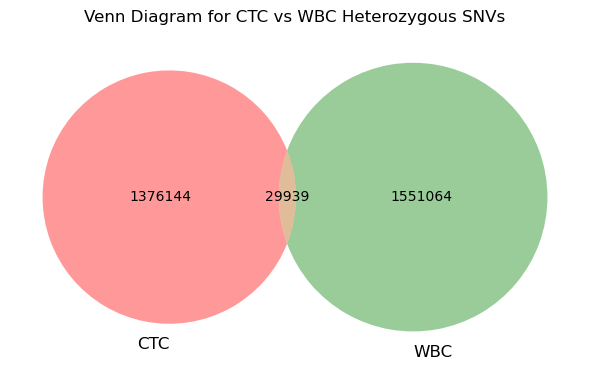

In [63]:
set_CTC = set(common_WBC_CTC).union(set(exclusive_CTC))
set_WBC = set(common_WBC_CTC).union(set(exclusive_WBC))

plt.figure(figsize=(6, 6))
venn2([set_CTC, set_WBC], set_labels=('CTC', 'WBC'))
plt.title("Venn Diagram for CTC vs WBC Heterozygous SNVs")
plt.tight_layout()
plt.show()

In [23]:
exclusive_wbc_df_filtered_snvs_heterozygous = pd.read_csv('./HaplotypeCaller/Ctrls/heterozygous/exclusive_wbc_df_filtered_snvs_heterozygous.csv')
print(exclusive_wbc_df_filtered_snvs_heterozygous.shape)
exclusive_wbc_df_filtered_snvs_heterozygous.head()

(1551064, 13)


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
0,chr10,3100353,.,T,A,39.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=2.08;DP=16;Exc...,GT:AD:DP:GQ:PL,"0/1:12,2:15:47:47,0,396",chr10:3100353:T:A,0/1,15.0
1,chr10,3104885,.,G,T,42.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=1.48;DP=14;Exc...,GT:AD:DP:GQ:PL,"0/1:11,2:13:50:50,0,414",chr10:3104885:G:T,0/1,13.0
2,chr10,3107117,.,G,A,46.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.967e+00;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:10,2:12:54:0|1:3107093_C_G:54,0,408:3107093",chr10:3107117:G:A,0|1,12.0
3,chr10,3119565,.,G,A,31.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.367e+00;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:15,2:17:39:1|0:3119553_G_A:39,0,624:3119553",chr10:3119565:G:A,0|1,17.0
4,chr10,3120554,.,C,T,51.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.510e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:51,7:58:59:59,0,1672",chr10:3120554:C:T,0/1,58.0


### Homozygous

In [35]:
exclusive_wbc_df_filtered_snvs_homozygous = exclusive_wbc_df_filtered_snvs[exclusive_wbc_df_filtered_snvs['genotype'].isin(['1/1', '1|1'])]
exclusive_wbc_df_filtered_snvs_homozygous.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
22686,chr10,13468281,.,C,T,1662.06,.,AC=2;AF=1.00;AN=2;DP=39;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,39:39:99:1676,117,0",chr10:13468281:C:T,1/1,39.0
44167,chr10,23501364,.,G,A,2761.06,.,AC=2;AF=1.00;AN=2;BaseQRankSum=1.96;DP=78;Exce...,GT:AD:DP:GQ:PL,"1/1:1,74:78:99:2775,206,0",chr10:23501364:G:A,1/1,78.0
48565,chr10,25482308,.,G,A,1090.06,.,AC=2;AF=1.00;AN=2;DP=36;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,34:35:99:1104,102,0",chr10:25482308:G:A,1/1,35.0
72067,chr10,36592510,.,G,A,446.05,.,AC=2;AF=1.00;AN=2;DP=19;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,12:17:49:554,49,0",chr10:36592510:G:A,1/1,17.0
101817,chr10,50511141,.,T,G,1761.06,.,AC=2;AF=1.00;AN=2;DP=48;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,47:47:99:1775,143,0",chr10:50511141:T:G,1/1,47.0


In [36]:
exclusive_wbc_df_filtered_snvs_homozygous.to_csv('./HaplotypeCaller/Ctrls/homozygous/exclusive_wbc_df_filtered_snvs_homozygous.csv', index=False)

In [37]:
exclusive_ctc_df_filtered_snvs_homozygous = exclusive_ctc_df_filtered_snvs[exclusive_ctc_df_filtered_snvs['genotype'].isin(['1/1', '1|1'])]
exclusive_ctc_df_filtered_snvs_homozygous.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
5247,chr10,5634909,.,C,T,1007.06,.,AC=2;AF=1.00;AN=2;DP=27;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,27:27:81:1021,81,0",chr10:5634909:C:T,1/1,27.0
12849,chr10,9287769,.,A,G,547.14,.,AC=2;AF=1.00;AN=2;BaseQRankSum=-9.490e-01;DP=1...,GT:AD:DP:GQ:PL,"1/1:1,18:19:12:561,12,0",chr10:9287769:A:G,1/1,19.0
19010,chr10,12182898,.,T,A,358.06,.,AC=2;AF=1.00;AN=2;DP=12;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,11:11:33:372,33,0",chr10:12182898:T:A,1/1,11.0
19436,chr10,12347579,.,A,G,930.06,.,AC=2;AF=1.00;AN=2;DP=26;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,26:26:78:944,78,0",chr10:12347579:A:G,1/1,26.0
21064,chr10,13077387,.,A,G,480.06,.,AC=2;AF=1.00;AN=2;DP=11;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,11:11:33:494,33,0",chr10:13077387:A:G,1/1,11.0


In [38]:
exclusive_ctc_df_filtered_snvs_homozygous.to_csv('./HaplotypeCaller/Ctrls/homozygous/exclusive_ctc_df_filtered_snvs_homozygous.csv', index=False)

In [39]:
common_df_filtered_snvs_homozygous = common_df_filtered_snvs[common_df_filtered_snvs['genotype'].isin(['1/1', '1|1'])]
common_df_filtered_snvs_homozygous.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
71,chr10,3134395,.,A,G,841.06,.,AC=2;AF=1.00;AN=2;DP=19;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,19:19:57:1|1:3134395_A_G:855,57,0:3134395",chr10:3134395:A:G,1|1,19.0
72,chr10,3134396,.,C,T,841.06,.,AC=2;AF=1.00;AN=2;DP=19;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,19:19:57:1|1:3134395_A_G:855,57,0:3134395",chr10:3134396:C:T,1|1,19.0
73,chr10,3134517,.,G,A,1070.06,.,AC=2;AF=1.00;AN=2;DP=25;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,25:25:75:1|1:3134517_G_A:1084,75,0:3134517",chr10:3134517:G:A,1|1,25.0
74,chr10,3134540,.,A,G,1065.06,.,AC=2;AF=1.00;AN=2;DP=24;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,24:24:72:1|1:3134517_G_A:1079,72,0:3134517",chr10:3134540:A:G,1|1,24.0
75,chr10,3134695,.,C,G,762.06,.,AC=2;AF=1.00;AN=2;DP=21;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,20:20:60:776,60,0",chr10:3134695:C:G,1/1,20.0


In [40]:
common_df_filtered_snvs_homozygous.to_csv('./HaplotypeCaller/Ctrls/homozygous/common_df_filtered_snvs_homozygous.csv', index=False)

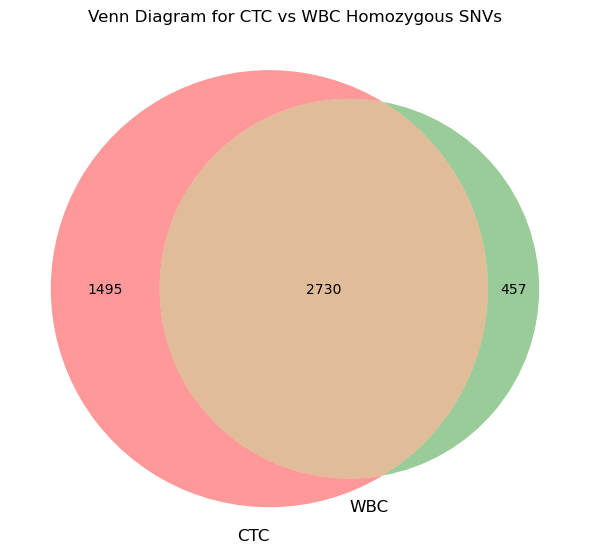

In [64]:
common_WBC_CTC = common_df_filtered_snvs_homozygous['mutid'].tolist()
exclusive_CTC = exclusive_ctc_df_filtered_snvs_homozygous['mutid'].tolist()
exclusive_WBC = exclusive_wbc_df_filtered_snvs_homozygous['mutid'].tolist()

set_CTC = set(common_WBC_CTC).union(set(exclusive_CTC))
set_WBC = set(common_WBC_CTC).union(set(exclusive_WBC))

plt.figure(figsize=(6, 6))
venn2([set_CTC, set_WBC], set_labels=('CTC', 'WBC'))
plt.title("Venn Diagram for CTC vs WBC Homozygous SNVs")
plt.tight_layout()
plt.show()

### Comparison with another Mutation Caller

In [15]:
wbc_vcf_bcf = pd.read_csv('/Users/ankit/Downloads/bcftools_files_02/merged_WBC_Ctrls_filtered.vcf', comment='#', sep='\t', header=None)
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE']
wbc_vcf_bcf.columns = columns
wbc_vcf_bcf.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE
0,chr10,3101621,.,A,T,29.6024,PASS,DP=14;VDB=0.02;SGB=-0.453602;RPBZ=1.57147;BQBZ...,GT:PL,"0/1:64,0,253"
1,chr10,3103392,.,T,C,24.2327,PASS,DP=33;VDB=0.235765;SGB=-0.511536;RPBZ=-0.16737...,GT:PL,"0/1:60,0,255"
2,chr10,3110293,.,T,A,42.4147,PASS,DP=5;VDB=0.756524;SGB=-0.511536;MQSBZ=1.22474;...,GT:PL,"1/1:72,9,0"
3,chr10,3110295,.,TAA,T,23.4229,PASS,INDEL;IDV=2;IMF=0.4;DP=5;VDB=0.548401;SGB=-0.4...,GT:PL,"0/1:56,0,53"
4,chr10,3112363,.,TAA,T,25.2484,PASS,INDEL;IDV=3;IMF=0.6;DP=5;VDB=0.233642;SGB=-0.5...,GT:PL,"0/1:58,0,36"


In [16]:
ctc_vcf_bcf = pd.read_csv('/Users/ankit/Downloads/bcftools_files_02/merged_CTC_Ctrls_filtered.vcf', comment='#', sep='\t', header=None)
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE']
ctc_vcf_bcf.columns = columns
ctc_vcf_bcf.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE
0,chr10,3101761,.,A,C,29.9448,PASS,DP=13;VDB=0.14;SGB=-0.453602;RPBZ=0.523823;BQB...,GT:PL,"0/1:64,0,218"
1,chr10,3103391,.,CTTTTTTTTTTT,CTTTTTTTTTT,55.3582,PASS,INDEL;IDV=15;IMF=0.428571;DP=35;VDB=0.0033401;...,GT:PL,"0/1:88,0,98"
2,chr10,3108317,.,A,G,222.4040,PASS,DP=78;VDB=0.0514306;SGB=-0.69312;RPBZ=1.72069;...,GT:PL,"0/1:255,0,255"
3,chr10,3108594,.,caaaaaaaaaaaaaaa,"cAAaaaaaaaaaaaaaaa,cAAAaaaaaaaaaaaaaaa",62.2859,PASS,INDEL;IDV=5;IMF=0.416667;DP=12;VDB=0.0576189;S...,GT:PL,"1/2:120,32,35,81,0,86"
4,chr10,3108609,.,a,aAC,26.2640,PASS,INDEL;IDV=2;IMF=0.181818;DP=11;VDB=0.176079;SG...,GT:PL,"0/1:59,0,22"


In [17]:
wbc_vcf_bcf['mutid'] = wbc_vcf_bcf['CHROM'].astype(str) + ':' + wbc_vcf_bcf['POS'].astype(str) + ':' + wbc_vcf_bcf['REF'] + ':' + wbc_vcf_bcf['ALT']
ctc_vcf_bcf['mutid'] = ctc_vcf_bcf['CHROM'].astype(str) + ':' + ctc_vcf_bcf['POS'].astype(str) + ':' + ctc_vcf_bcf['REF'] + ':' + ctc_vcf_bcf['ALT']
wbc_mutations_bcftools = set(wbc_vcf_bcf['mutid'])
ctc_mutations_bcftools = set(ctc_vcf_bcf['mutid'])

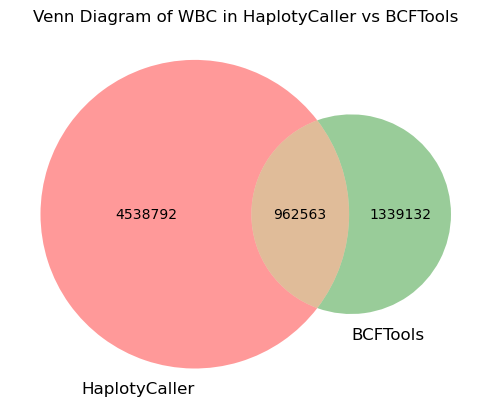

In [60]:
venn2([wbc_mutations, wbc_mutations_bcftools], ('HaplotyCaller', 'BCFTools'))
plt.title('Venn Diagram of WBC in HaplotyCaller vs BCFTools')
plt.show()

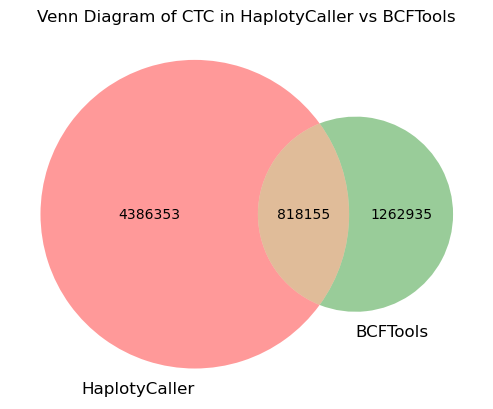

In [61]:
venn2([ctc_mutations, ctc_mutations_bcftools], ('HaplotyCaller', 'BCFTools'))
plt.title('Venn Diagram of CTC in HaplotyCaller vs BCFTools')
plt.show()

## Mutect2

In [7]:
ctc_vcf_mut = pd.read_csv('Mutect2/CTC_merged_RG/CTC_merged_RG.vcf', comment='#', sep='\t', header=None)
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'CTC_merged', 'WBC_merged']
ctc_vcf_mut.columns = columns
ctc_vcf_mut.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,CTC_merged,WBC_merged
0,chr10,3101623,.,C,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=9,7|1,1;DP=18...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/1:2,2:0.400:4:2,0:0,2:1,1,1,1","0/0:14,0:0.083:14:8,0:6,0:8,6,0,0"
1,chr10,3103832,.,C,T,.,weak_evidence,"AS_FilterStatus=weak_evidence;AS_SB_TABLE=2,16...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/1:9,2:0.197:11:6,2:3,0:2,7,1,1","0/0:9,0:0.091:9:2,0:7,0:0,9,0,0"
2,chr10,3105017,.,AT,A,.,haplotype;normal_artifact,"AS_FilterStatus=SITE;AS_SB_TABLE=44,29|3,1;DP=...",GT:AD:AF:DP:F1R2:F2R1:PGT:PID:PS:SB,"0|1:40,3:0.090:43:14,0:23,3:0|1:3105017_AT_A:3...","0|0:33,1:0.073:34:11,0:22,1:0|1:3105017_AT_A:3..."
3,chr10,3105027,.,G,A,.,haplotype,"AS_FilterStatus=SITE;AS_SB_TABLE=45,30|1,1;DP=...",GT:AD:AF:DP:F1R2:F2R1:PGT:PID:PS:SB,"0|1:41,2:0.059:43:15,0:26,2:0|1:3105017_AT_A:3...","0|0:34,0:0.034:34:10,0:23,0:0|1:3105017_AT_A:3..."
4,chr10,3107009,.,C,G,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=19,10|1,1;DP=...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/1:15,2:0.143:17:4,0:10,2:9,6,1,1","0/0:14,0:0.083:14:8,0:6,0:10,4,0,0"


In [8]:
ctc_vcf_mut.shape

(2712155, 11)

In [9]:
ctc_vcf_mut['mutid'] = ctc_vcf_mut['CHROM'].astype(str) + ':' + ctc_vcf_mut['POS'].astype(str) + ':' + ctc_vcf_mut['REF'] + ':' + ctc_vcf_mut['ALT']
ctc_vcf_mut.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,CTC_merged,WBC_merged,mutid
0,chr10,3101623,.,C,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=9,7|1,1;DP=18...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/1:2,2:0.400:4:2,0:0,2:1,1,1,1","0/0:14,0:0.083:14:8,0:6,0:8,6,0,0",chr10:3101623:C:A
1,chr10,3103832,.,C,T,.,weak_evidence,"AS_FilterStatus=weak_evidence;AS_SB_TABLE=2,16...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/1:9,2:0.197:11:6,2:3,0:2,7,1,1","0/0:9,0:0.091:9:2,0:7,0:0,9,0,0",chr10:3103832:C:T
2,chr10,3105017,.,AT,A,.,haplotype;normal_artifact,"AS_FilterStatus=SITE;AS_SB_TABLE=44,29|3,1;DP=...",GT:AD:AF:DP:F1R2:F2R1:PGT:PID:PS:SB,"0|1:40,3:0.090:43:14,0:23,3:0|1:3105017_AT_A:3...","0|0:33,1:0.073:34:11,0:22,1:0|1:3105017_AT_A:3...",chr10:3105017:AT:A
3,chr10,3105027,.,G,A,.,haplotype,"AS_FilterStatus=SITE;AS_SB_TABLE=45,30|1,1;DP=...",GT:AD:AF:DP:F1R2:F2R1:PGT:PID:PS:SB,"0|1:41,2:0.059:43:15,0:26,2:0|1:3105017_AT_A:3...","0|0:34,0:0.034:34:10,0:23,0:0|1:3105017_AT_A:3...",chr10:3105027:G:A
4,chr10,3107009,.,C,G,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=19,10|1,1;DP=...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/1:15,2:0.143:17:4,0:10,2:9,6,1,1","0/0:14,0:0.083:14:8,0:6,0:10,4,0,0",chr10:3107009:C:G


In [11]:
ctc_vcf['FILTER'].unique()

array(['PASS', 'weak_evidence', 'haplotype;normal_artifact', 'haplotype',
       'normal_artifact', 'clustered_events',
       'clustered_events;normal_artifact;orientation',
       'clustered_events;normal_artifact',
       'clustered_events;normal_artifact;orientation;weak_evidence',
       'normal_artifact;orientation', 'orientation', 'base_qual',
       'base_qual;normal_artifact', 'normal_artifact;weak_evidence',
       'slippage', 'clustered_events;haplotype',
       'clustered_events;haplotype;normal_artifact',
       'orientation;weak_evidence',
       'clustered_events;haplotype;weak_evidence',
       'clustered_events;weak_evidence',
       'germline;multiallelic;normal_artifact', 'map_qual',
       'base_qual;clustered_events',
       'multiallelic;normal_artifact;slippage',
       'normal_artifact;strand_bias',
       'base_qual;clustered_events;haplotype;weak_evidence',
       'clustered_events;orientation',
       'clustered_events;multiallelic;slippage',
       'clustere

In [12]:
ctc_vcf['genotype_ctc'] = ctc_vcf['CTC_merged'].str.split(':').str[0]
ctc_vcf['genotype_wbc'] = ctc_vcf['WBC_merged'].str.split(':').str[0]
ctc_vcf.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,CTC_merged,WBC_merged,genotype_ctc,genotype_wbc
0,chr10,3101623,.,C,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=9,7|1,1;DP=18...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/1:2,2:0.400:4:2,0:0,2:1,1,1,1","0/0:14,0:0.083:14:8,0:6,0:8,6,0,0",0/1,0/0
1,chr10,3103832,.,C,T,.,weak_evidence,"AS_FilterStatus=weak_evidence;AS_SB_TABLE=2,16...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/1:9,2:0.197:11:6,2:3,0:2,7,1,1","0/0:9,0:0.091:9:2,0:7,0:0,9,0,0",0/1,0/0
2,chr10,3105017,.,AT,A,.,haplotype;normal_artifact,"AS_FilterStatus=SITE;AS_SB_TABLE=44,29|3,1;DP=...",GT:AD:AF:DP:F1R2:F2R1:PGT:PID:PS:SB,"0|1:40,3:0.090:43:14,0:23,3:0|1:3105017_AT_A:3...","0|0:33,1:0.073:34:11,0:22,1:0|1:3105017_AT_A:3...",0|1,0|0
3,chr10,3105027,.,G,A,.,haplotype,"AS_FilterStatus=SITE;AS_SB_TABLE=45,30|1,1;DP=...",GT:AD:AF:DP:F1R2:F2R1:PGT:PID:PS:SB,"0|1:41,2:0.059:43:15,0:26,2:0|1:3105017_AT_A:3...","0|0:34,0:0.034:34:10,0:23,0:0|1:3105017_AT_A:3...",0|1,0|0
4,chr10,3107009,.,C,G,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=19,10|1,1;DP=...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/1:15,2:0.143:17:4,0:10,2:9,6,1,1","0/0:14,0:0.083:14:8,0:6,0:10,4,0,0",0/1,0/0


In [15]:
ctc_vcf['DP_ctc'] = ctc_vcf['CTC_merged'].str.split(':').str[3].astype(float)
ctc_vcf['DP_wbc'] = ctc_vcf['WBC_merged'].str.split(':').str[3].astype(float)
ctc_vcf_filtered = ctc_vcf[(ctc_vcf['DP_ctc'] > 10) & (ctc_vcf['DP_wbc'] > 10)]
# ctc_vcf_filtered = ctc_vcf[ctc_vcf['DP_wbc'] > 10]
ctc_vcf_filtered_snvs = ctc_vcf_filtered[(ctc_vcf_filtered['REF'].str.len() == 1) & (ctc_vcf_filtered['ALT'].str.len() == 1)]
ctc_vcf_filtered_snvs.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,CTC_merged,WBC_merged,genotype_ctc,genotype_wbc,DP_ctc,DP_wbc
3,chr10,3105027,.,G,A,.,haplotype,"AS_FilterStatus=SITE;AS_SB_TABLE=45,30|1,1;DP=...",GT:AD:AF:DP:F1R2:F2R1:PGT:PID:PS:SB,"0|1:41,2:0.059:43:15,0:26,2:0|1:3105017_AT_A:3...","0|0:34,0:0.034:34:10,0:23,0:0|1:3105017_AT_A:3...",0|1,0|0,43.0,34.0
4,chr10,3107009,.,C,G,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=19,10|1,1;DP=...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/1:15,2:0.143:17:4,0:10,2:9,6,1,1","0/0:14,0:0.083:14:8,0:6,0:10,4,0,0",0/1,0/0,17.0,14.0
7,chr10,3107734,.,T,C,.,normal_artifact,"AS_FilterStatus=SITE;AS_SB_TABLE=54,56|3,0;DP=...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/1:60,2:0.057:62:29,1:30,1:27,33,2,0","0/0:50,1:0.043:51:17,1:31,0:27,23,1,0",0/1,0/0,62.0,51.0
9,chr10,3108268,.,A,G,.,clustered_events,"AS_FilterStatus=SITE;AS_SB_TABLE=58,55|1,3;DP=...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/1:60,4:0.075:64:33,3:27,1:35,25,1,3","0/0:53,0:0.023:53:30,0:22,0:23,30,0,0",0/1,0/0,64.0,53.0
10,chr10,3108317,.,A,G,.,clustered_events,"AS_FilterStatus=SITE;AS_SB_TABLE=35,37|15,18;D...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/1:29,33:0.509:62:11,19:17,14:14,15,15,18","0/0:43,0:0.026:43:30,0:13,0:21,22,0,0",0/1,0/0,62.0,43.0


In [16]:
ctc_vcf_filtered_snvs.shape

(1319666, 15)

In [17]:
ctc_vcf_filtered_snvs['genotype_ctc'].unique()

array(['0|1', '0/1', '1|0'], dtype=object)

In [18]:
ctc_vcf_filtered_snvs['genotype_wbc'].unique()

array(['0|0', '0/0'], dtype=object)

In [19]:
ctc_vcf_filtered_snvs.to_csv('./Mutect2/CTC_merged_RG/ctc_vcf_filtered_snvs.csv', index=False)

In [11]:
ctc_mut_mutations = set(ctc_vcf_mut['mutid'])

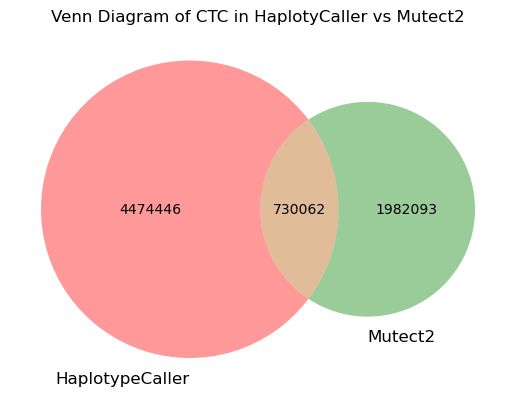

In [13]:
venn2([ctc_mutations, ctc_mut_mutations], ('HaplotypeCaller', 'Mutect2'))
plt.title('Venn Diagram of CTC in HaplotyCaller vs Mutect2')
plt.show()

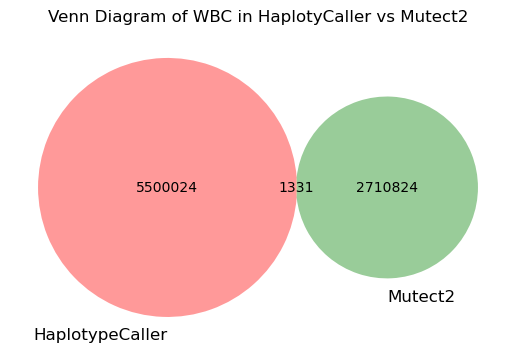

In [14]:
venn2([wbc_mutations, ctc_mut_mutations], ('HaplotypeCaller', 'Mutect2'))
plt.title('Venn Diagram of WBC in HaplotyCaller vs Mutect2')
plt.show()

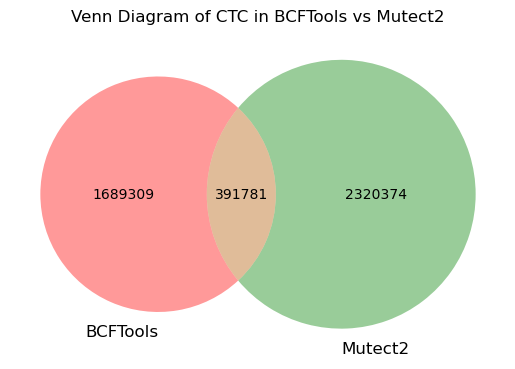

In [18]:
venn2([ctc_mutations_bcftools, ctc_mut_mutations], ('BCFTools', 'Mutect2'))
plt.title('Venn Diagram of CTC in BCFTools vs Mutect2')
plt.show()

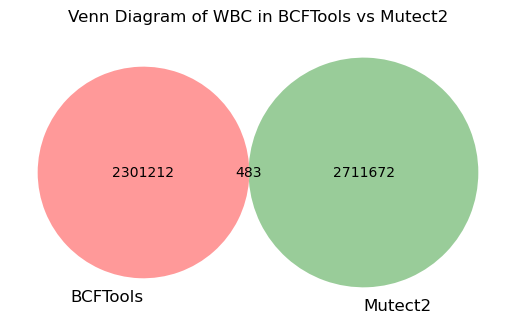

In [19]:
venn2([wbc_mutations_bcftools, ctc_mut_mutations], ('BCFTools', 'Mutect2'))
plt.title('Venn Diagram of WBC in BCFTools vs Mutect2')
plt.show()

In [25]:
ctc_vcf_bcf = pd.read_csv('/Users/ankit/Downloads/bcftools_files_02/exclusive_ctc_df_homozygous_filtered_snvs.csv')#, comment='#', sep='\t', header=None)
ctc_vcf_bcf.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
0,chr10,5634909,.,C,T,225.417,PASS,DP=33;VDB=0.958358;SGB=-0.692831;FS=0;MQ0F=0;A...,GT:PL,"1/1:255,72,0",chr10:5634909:C:T,1/1,33.0
1,chr10,6983074,.,C,T,224.861,PASS,DP=15;VDB=0.907553;SGB=-0.676189;RPBZ=0.145095...,GT:PL,"1/1:255,0,4",chr10:6983074:C:T,1/1,15.0
2,chr10,7495968,.,T,C,153.416,PASS,DP=21;VDB=0.0452455;SGB=-0.556411;FS=0;MQ0F=0;...,GT:PL,"1/1:183,12,0",chr10:7495968:T:C,1/1,21.0
3,chr10,7579953,.,T,G,225.417,PASS,DP=14;VDB=0.00430975;SGB=-0.670168;FS=0;MQ0F=0...,GT:PL,"1/1:255,30,0",chr10:7579953:T:G,1/1,14.0
4,chr10,9287769,.,A,G,227.490,PASS,DP=19;VDB=0.604147;SGB=-0.680642;RPBZ=-0.40144...,GT:PL,"1/1:255,0,1",chr10:9287769:A:G,1/1,19.0


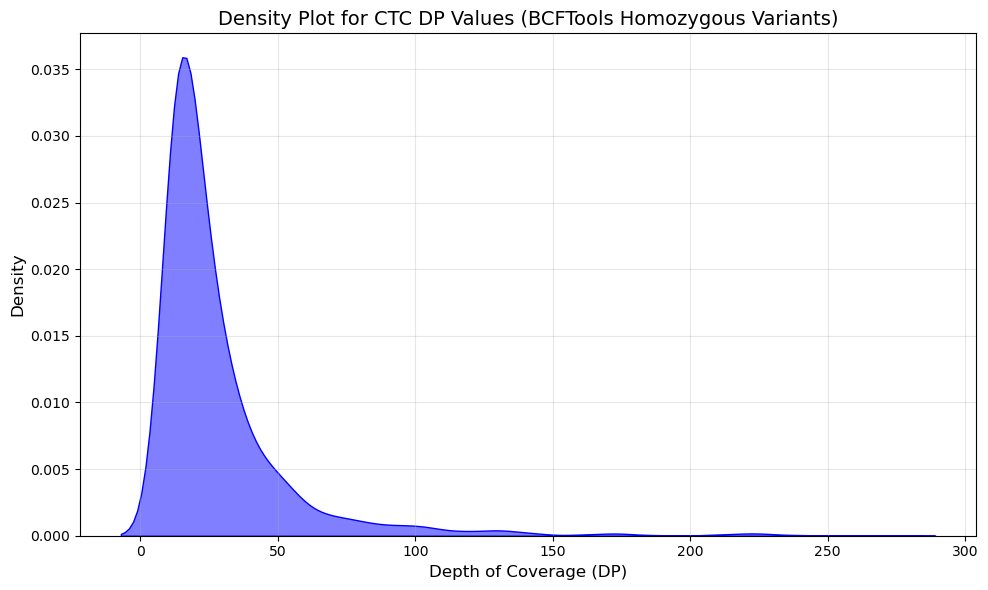

In [27]:
# exclusive_ctc_df_homozygous['DP'] = exclusive_ctc_df_homozygous['INFO'].str.extract(r'DP=(\d+)')[0].astype(float)
# Plot the density of DP values
plt.figure(figsize=(10, 6))
sns.kdeplot(ctc_vcf_bcf['DP'], fill=True, color="blue", alpha=0.5)
plt.title("Density Plot for CTC DP Values (BCFTools Homozygous Variants)", fontsize=14)
plt.xlabel("Depth of Coverage (DP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

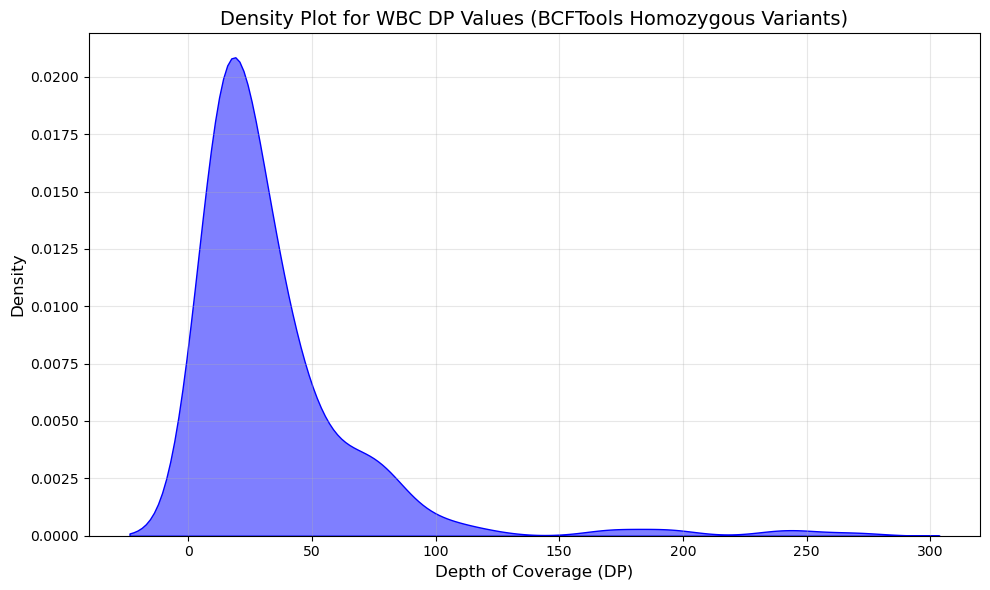

In [29]:
wbc_vcf_bcf = pd.read_csv('/Users/ankit/Downloads/bcftools_files_02/exclusive_wbc_df_homozygous_filtered_snvs_new.csv')#, comment='#', sep='\t', header=None)
plt.figure(figsize=(10, 6))
sns.kdeplot(wbc_vcf_bcf['DP'], fill=True, color="blue", alpha=0.5)
plt.title("Density Plot for WBC DP Values (BCFTools Homozygous Variants)", fontsize=14)
plt.xlabel("Depth of Coverage (DP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

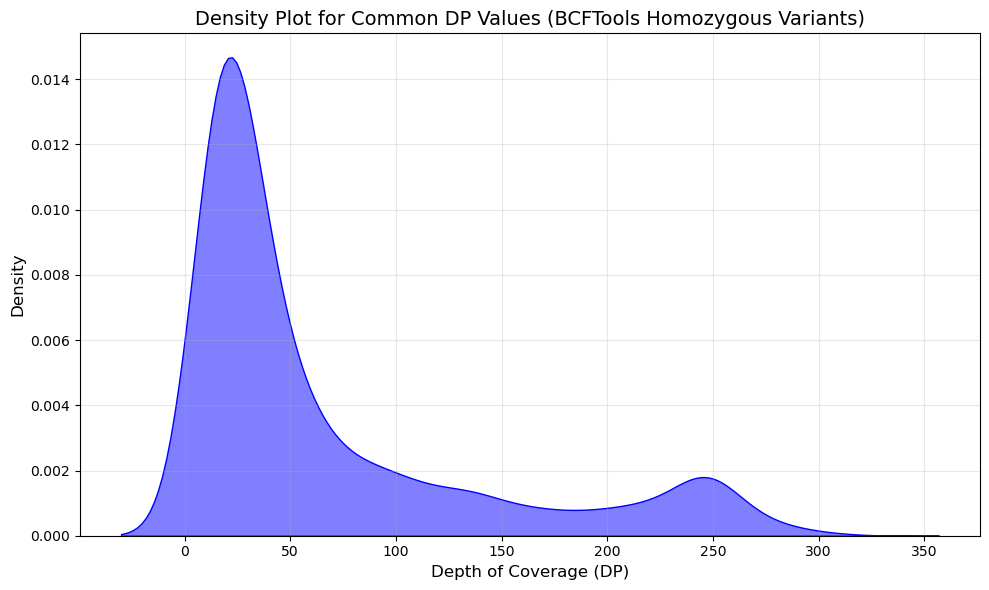

In [30]:
common_vcf_bcf = pd.read_csv('/Users/ankit/Downloads/bcftools_files_02/common_df_homozygous_filtered_snvs.csv')#, comment='#', sep='\t', header=None)
plt.figure(figsize=(10, 6))
sns.kdeplot(common_vcf_bcf['DP'], fill=True, color="blue", alpha=0.5)
plt.title("Density Plot for Common DP Values (BCFTools Homozygous Variants)", fontsize=14)
plt.xlabel("Depth of Coverage (DP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

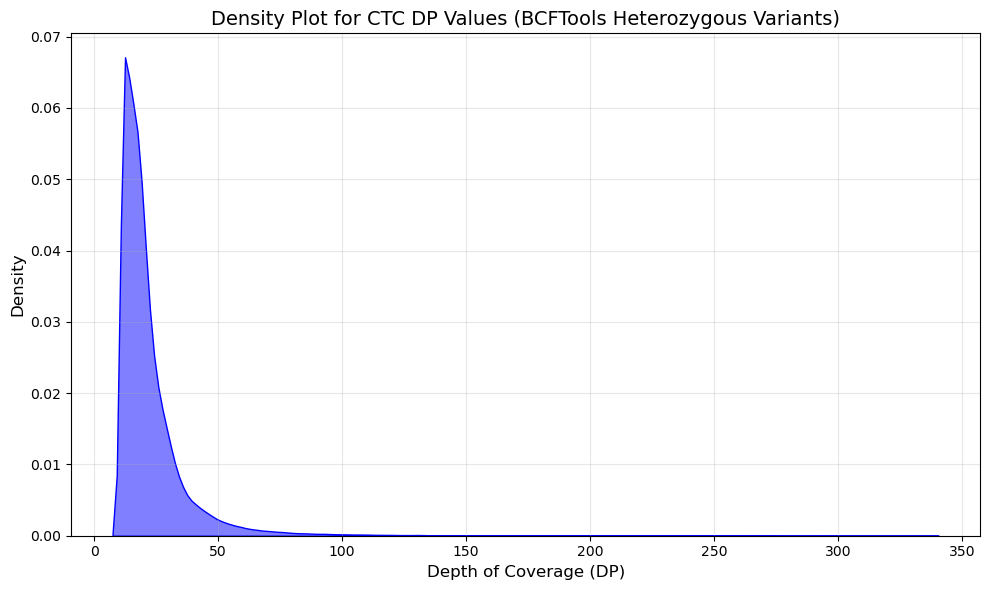

In [31]:
ctc_vcf_bcf = pd.read_csv('/Users/ankit/Downloads/heterozygous_csv/exclusive_ctc_df_filtered_snvs_heterozygous.csv')#, comment='#', sep='\t', header=None)
plt.figure(figsize=(10, 6))
sns.kdeplot(ctc_vcf_bcf['DP'], fill=True, color="blue", alpha=0.5)
plt.title("Density Plot for CTC DP Values (BCFTools Heterozygous Variants)", fontsize=14)
plt.xlabel("Depth of Coverage (DP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

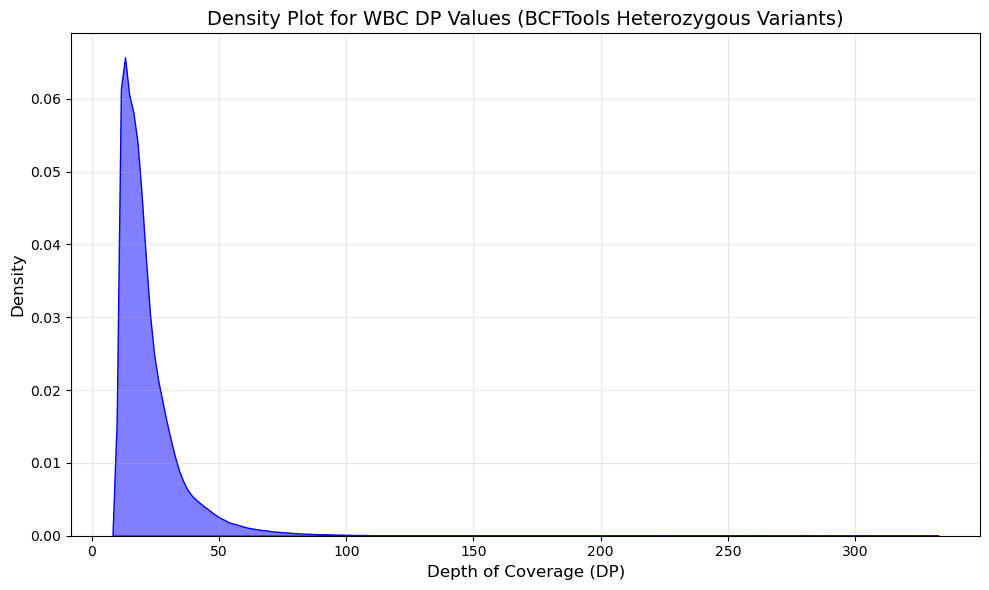

In [32]:
wbc_vcf_bcf = pd.read_csv('/Users/ankit/Downloads/heterozygous_csv/exclusive_wbc_df_filtered_snvs_heterozygous.csv')#, comment='#', sep='\t', header=None)
plt.figure(figsize=(10, 6))
sns.kdeplot(wbc_vcf_bcf['DP'], fill=True, color="blue", alpha=0.5)
plt.title("Density Plot for WBC DP Values (BCFTools Heterozygous Variants)", fontsize=14)
plt.xlabel("Depth of Coverage (DP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

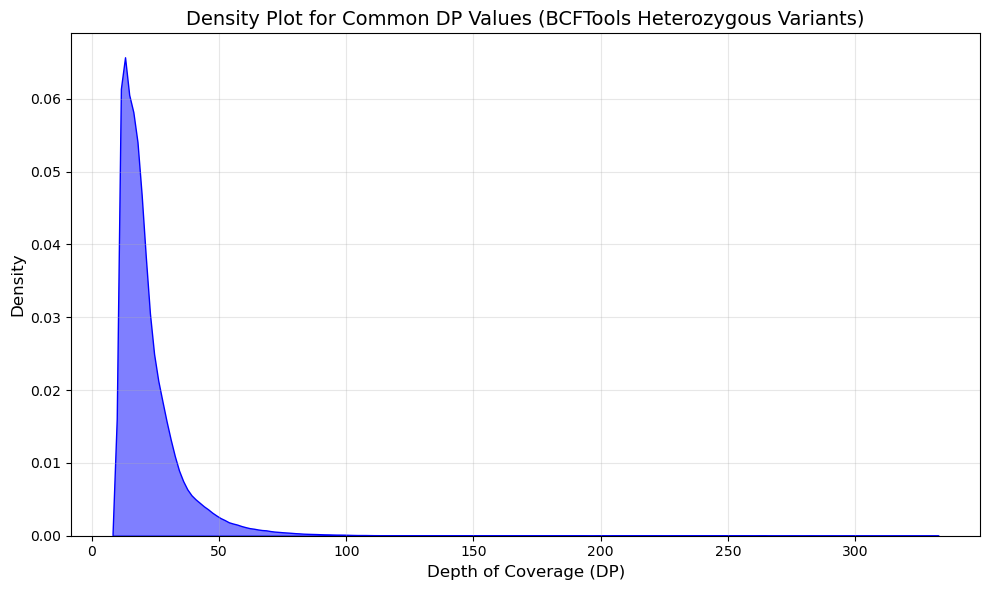

In [33]:
common_vcf_bcf = pd.read_csv('/Users/ankit/Downloads/heterozygous_csv/common_df_filtered_snvs_heterozygous.csv')#, comment='#', sep='\t', header=None)
plt.figure(figsize=(10, 6))
sns.kdeplot(wbc_vcf_bcf['DP'], fill=True, color="blue", alpha=0.5)
plt.title("Density Plot for Common DP Values (BCFTools Heterozygous Variants)", fontsize=14)
plt.xlabel("Depth of Coverage (DP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

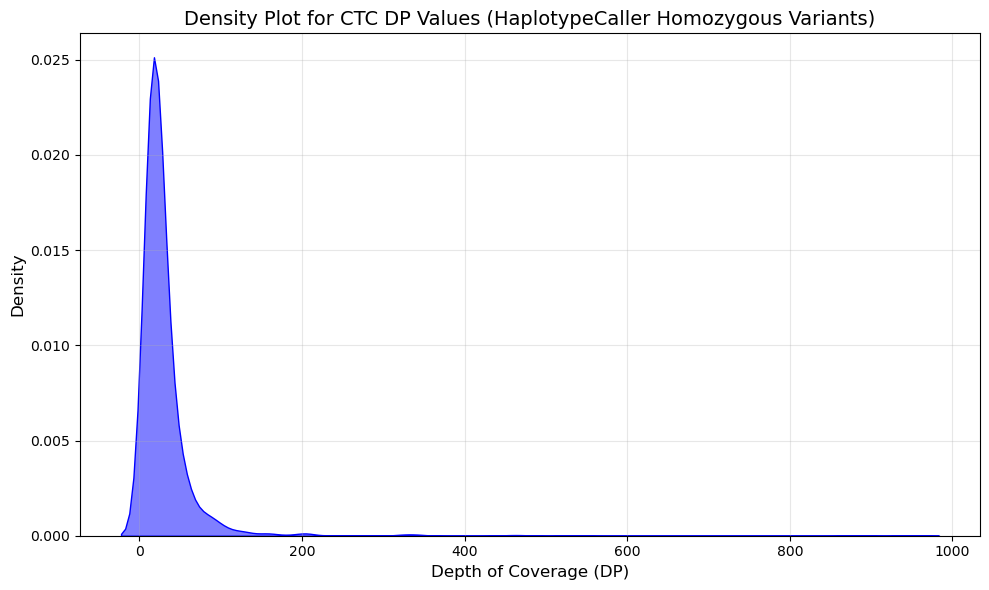

In [34]:
ctc_vcf_bcf = pd.read_csv('/Users/ankit/Desktop/Mutation Calling/HaplotypeCaller/Ctrls/homozygous/exclusive_ctc_df_filtered_snvs_homozygous.csv')
plt.figure(figsize=(10, 6))
sns.kdeplot(ctc_vcf_bcf['DP'], fill=True, color="blue", alpha=0.5)
plt.title("Density Plot for CTC DP Values (HaplotypeCaller Homozygous Variants)", fontsize=14)
plt.xlabel("Depth of Coverage (DP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

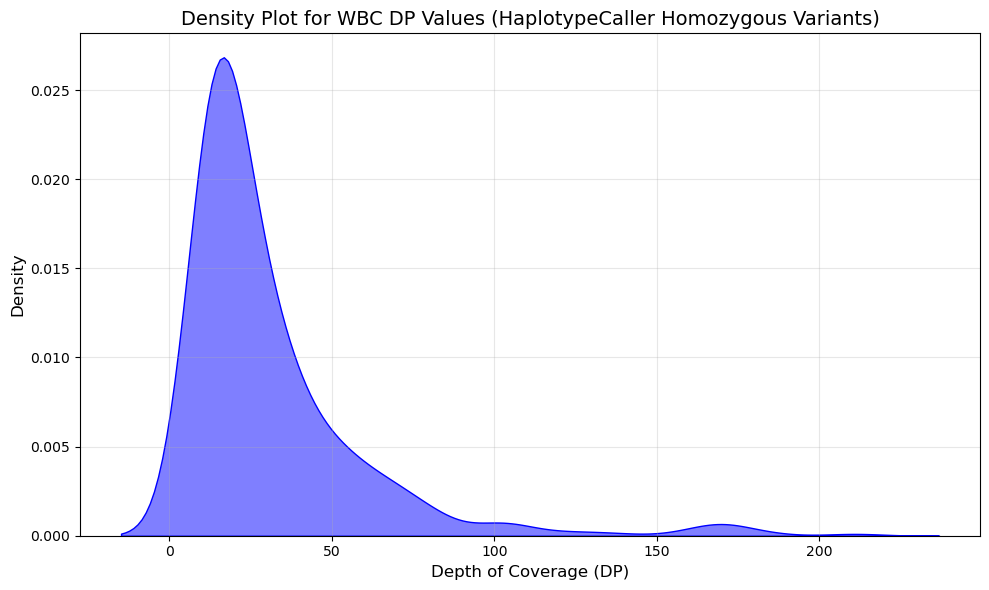

In [38]:
wbc_vcf_bcf = pd.read_csv('/Users/ankit/Desktop/Mutation Calling/HaplotypeCaller/Ctrls/homozygous/exclusive_wbc_df_filtered_snvs_homozygous.csv')
plt.figure(figsize=(10, 6))
sns.kdeplot(wbc_vcf_bcf['DP'], fill=True, color="blue", alpha=0.5)
plt.title("Density Plot for WBC DP Values (HaplotypeCaller Homozygous Variants)", fontsize=14)
plt.xlabel("Depth of Coverage (DP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

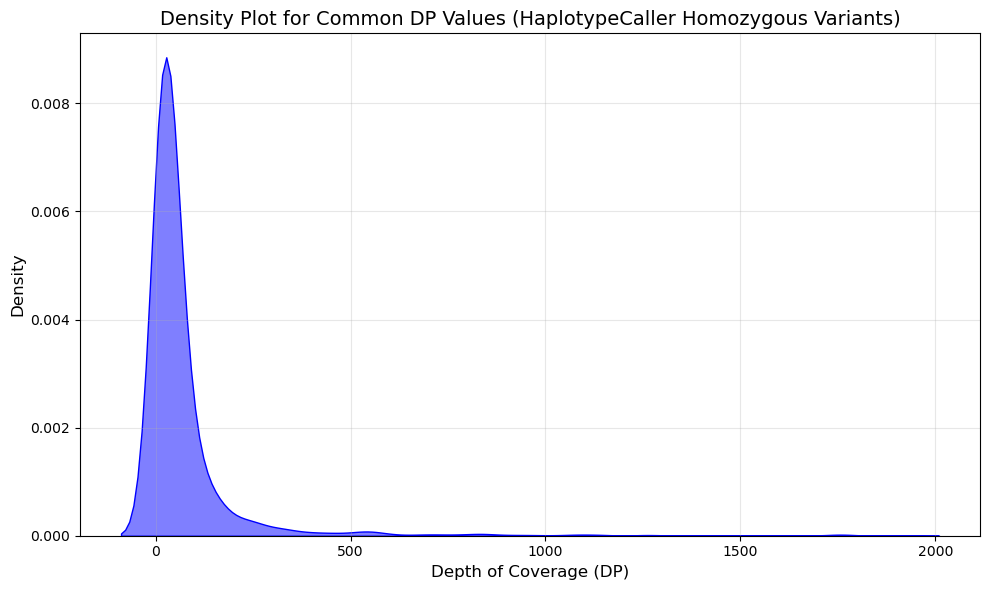

In [39]:
common_vcf_bcf = pd.read_csv('/Users/ankit/Desktop/Mutation Calling/HaplotypeCaller/Ctrls/homozygous/common_df_filtered_snvs_homozygous.csv')
plt.figure(figsize=(10, 6))
sns.kdeplot(common_vcf_bcf['DP'], fill=True, color="blue", alpha=0.5)
plt.title("Density Plot for Common DP Values (HaplotypeCaller Homozygous Variants)", fontsize=14)
plt.xlabel("Depth of Coverage (DP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

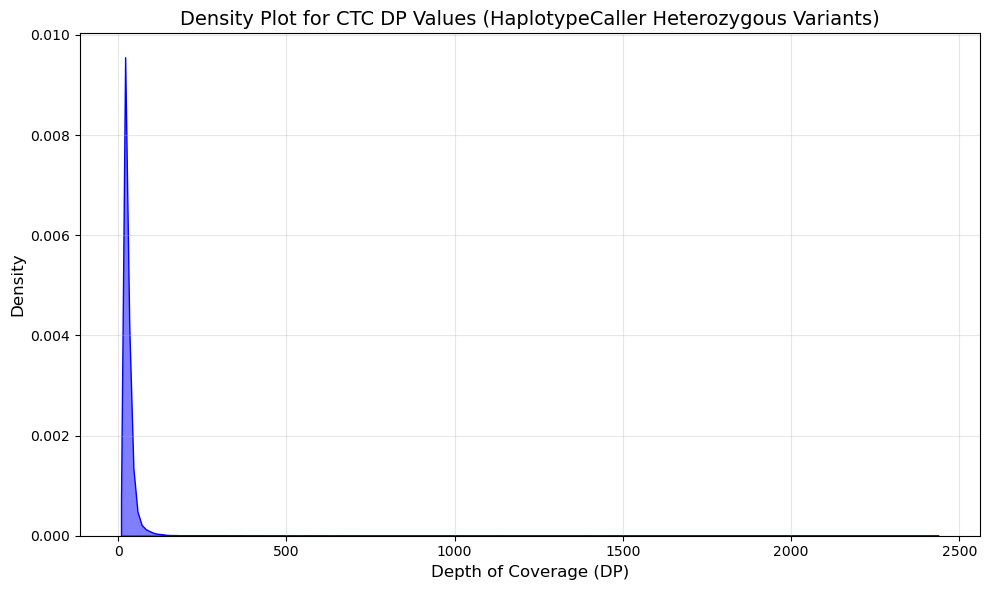

In [40]:
ctc_vcf_bcf = pd.read_csv('/Users/ankit/Desktop/Mutation Calling/HaplotypeCaller/Ctrls/heterozygous/exclusive_ctc_df_filtered_snvs_heterozygous.csv')
plt.figure(figsize=(10, 6))
sns.kdeplot(ctc_vcf_bcf['DP'], fill=True, color="blue", alpha=0.5)
plt.title("Density Plot for CTC DP Values (HaplotypeCaller Heterozygous Variants)", fontsize=14)
plt.xlabel("Depth of Coverage (DP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

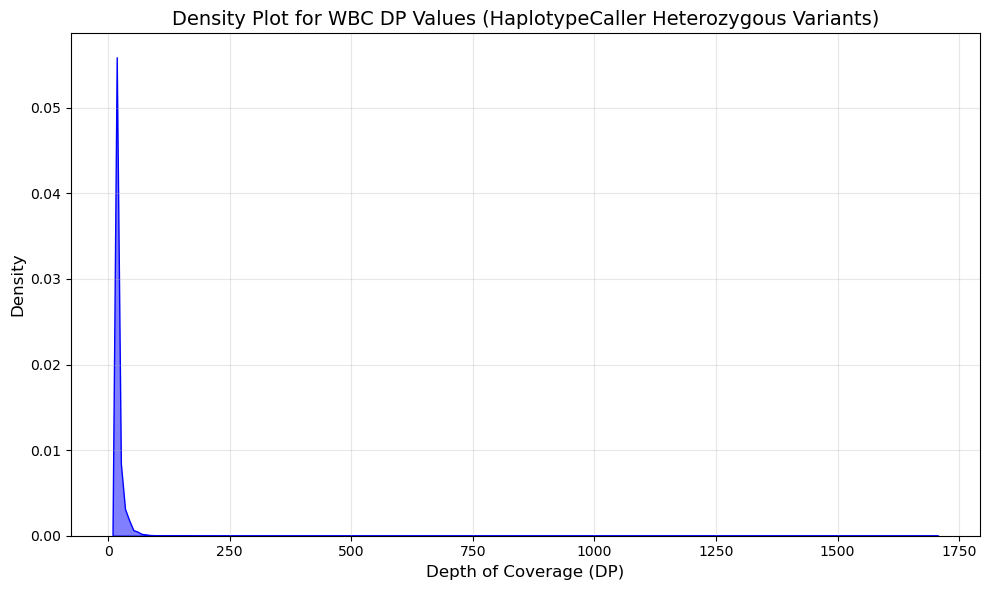

In [43]:
wbc_vcf_bcf = pd.read_csv('/Users/ankit/Desktop/Mutation Calling/HaplotypeCaller/Ctrls/heterozygous/exclusive_wbc_df_filtered_snvs_heterozygous.csv')
plt.figure(figsize=(10, 6))
sns.kdeplot(wbc_vcf_bcf['DP'], fill=True, color="blue", alpha=0.5)
plt.title("Density Plot for WBC DP Values (HaplotypeCaller Heterozygous Variants)", fontsize=14)
plt.xlabel("Depth of Coverage (DP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

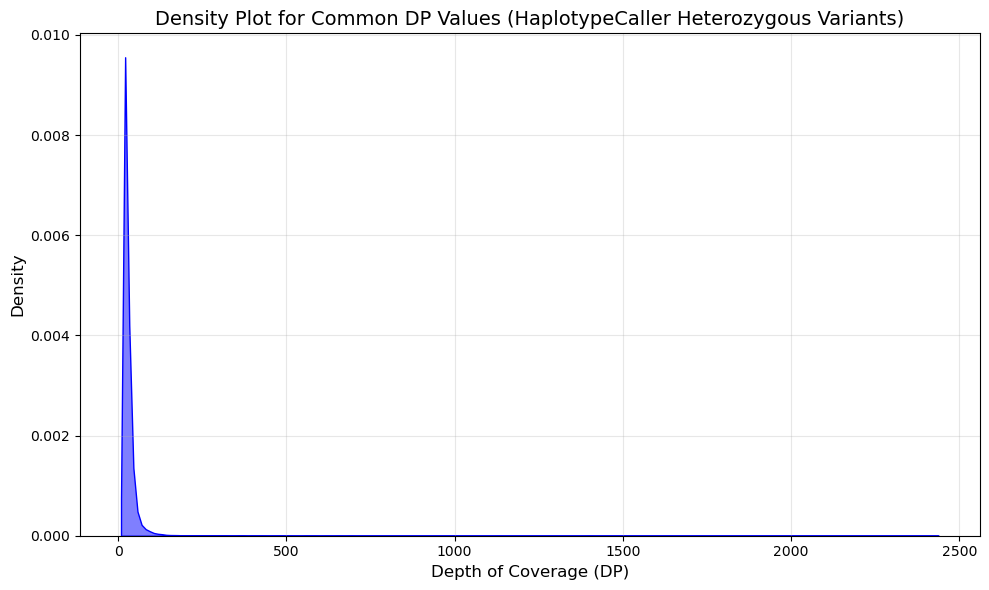

In [42]:
common_vcf_bcf = pd.read_csv('/Users/ankit/Desktop/Mutation Calling/HaplotypeCaller/Ctrls/heterozygous/common_df_filtered_snvs_heterozygous.csv')
plt.figure(figsize=(10, 6))
sns.kdeplot(wbc_vcf_bcf['DP'], fill=True, color="blue", alpha=0.5)
plt.title("Density Plot for Common DP Values (HaplotypeCaller Heterozygous Variants)", fontsize=14)
plt.xlabel("Depth of Coverage (DP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

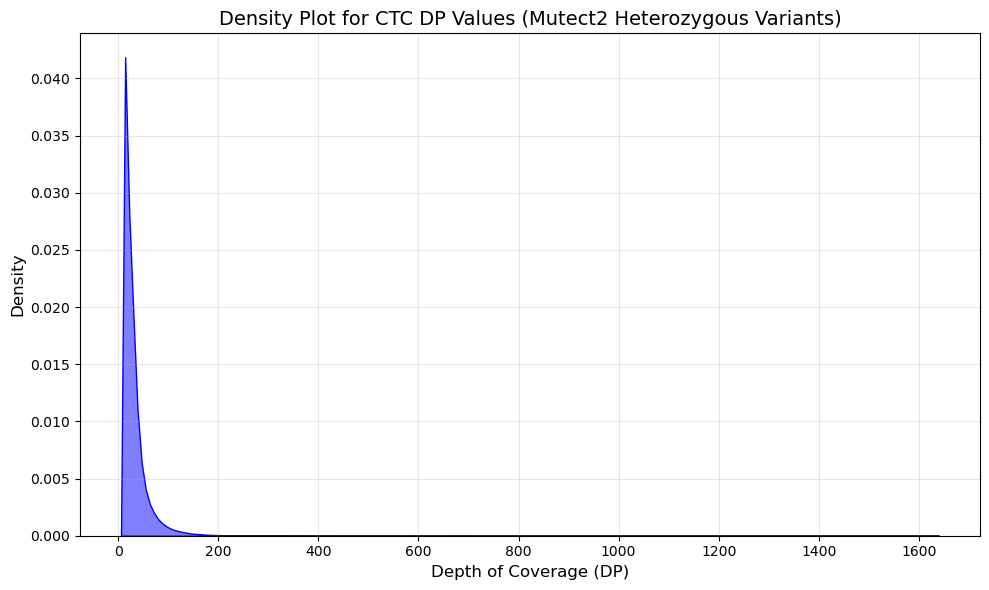

In [44]:
ctc_vcf_bcf = pd.read_csv('/Users/ankit/Desktop/Mutation Calling/Mutect2/CTC_merged_RG/ctc_vcf_filtered_snvs.csv')
plt.figure(figsize=(10, 6))
sns.kdeplot(ctc_vcf_bcf['DP_ctc'], fill=True, color="blue", alpha=0.5)
plt.title("Density Plot for CTC DP Values (Mutect2 Heterozygous Variants)", fontsize=14)
plt.xlabel("Depth of Coverage (DP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

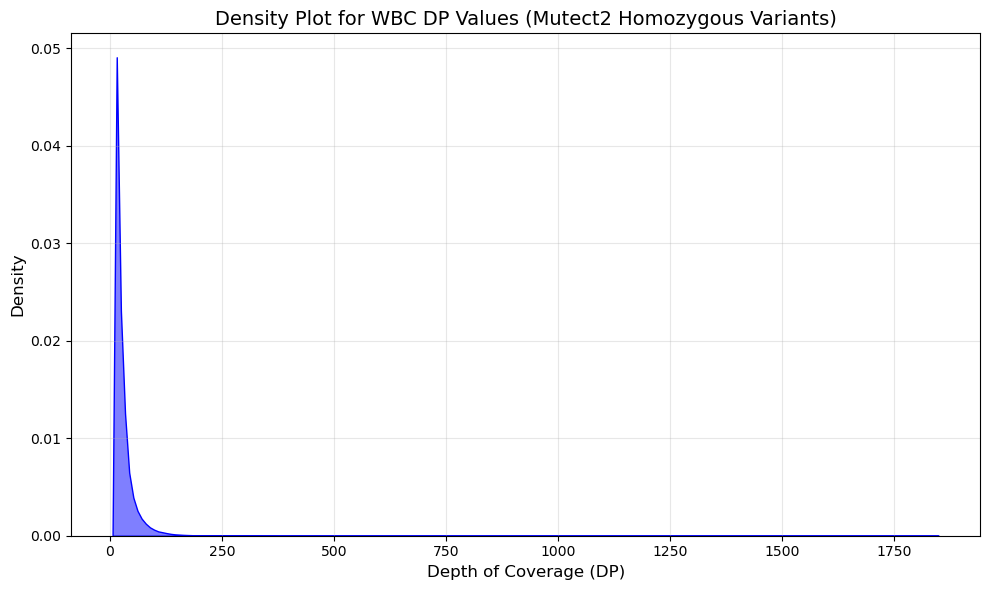

In [45]:
wbc_vcf_bcf = pd.read_csv('/Users/ankit/Desktop/Mutation Calling/Mutect2/CTC_merged_RG/ctc_vcf_filtered_snvs.csv')
plt.figure(figsize=(10, 6))
sns.kdeplot(ctc_vcf_bcf['DP_wbc'], fill=True, color="blue", alpha=0.5)
plt.title("Density Plot for WBC DP Values (Mutect2 Homozygous Variants)", fontsize=14)
plt.xlabel("Depth of Coverage (DP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

### HaplotypeCaller for Platelets

In [2]:
ctc_plt_pos = pd.read_csv('HaplotypeCaller/Plt/platelet_positive_merged_RG/platelet_positive_RG.g.vcf.gz.final.vcf', comment='#', sep='\t', header=None)
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE']
ctc_plt_pos.columns = columns
ctc_plt_pos.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE
0,chr10,3100339,.,A,G,44.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.476;DP=100;E...,GT:AD:DP:GQ:PL,"0/1:81,9:93:52:52,0,3127"
1,chr10,3101136,.,TA,T,74.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.826;DP=38;Ex...,GT:AD:DP:GQ:PL,"0/1:30,7:38:82:82,0,868"
2,chr10,3101630,.,C,A,70.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-8.820e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:31,6:38:78:78,0,919"
3,chr10,3101685,.,C,A,76.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-2.466e+00;DP=...,GT:AD:DP:GQ:PL,"0/1:28,6:37:84:84,0,1087"
4,chr10,3102600,.,C,CTCCACACTACCTCAA,47.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-7.670e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:71,7:81:55:55,0,3086"


In [3]:
ctc_plt_neg = pd.read_csv('HaplotypeCaller/Plt/platelet_negative_merged_RG/platelet_negative_merged_RG.g.vcf.gz.final.vcf', comment='#', sep='\t', header=None)
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE']
ctc_plt_neg.columns = columns
ctc_plt_neg.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE
0,chr10,3100482,.,A,ACCTCCAC,43.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;DP=14;Exc...,GT:AD:DP:GQ:PL,"0/1:11,2:13:51:51,0,429"
1,chr10,3101070,.,G,A,160.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;DP=17;Exc...,GT:AD:DP:GQ:PL,"0/1:5,8:13:99:168,0,119"
2,chr10,3101242,.,TA,T,37.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-6.640e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:43,6:55:45:45,0,1475"
3,chr10,3102600,.,C,CTCCACACTACCTCAA,392.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=3.64;DP=120;Ex...,GT:AD:DP:GQ:PL,"0/1:88,16:106:99:400,0,3477"
4,chr10,3103233,.,G,C,437.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=5.50;DP=345;Ex...,GT:AD:DP:GQ:PL,"0/1:302,34:339:99:445,0,12503"


In [4]:
ctc_plt_pos['mutid'] = ctc_plt_pos['CHROM'].astype(str) + ':' + ctc_plt_pos['POS'].astype(str) + ':' + ctc_plt_pos['REF'] + ':' + ctc_plt_pos['ALT']
ctc_plt_neg['mutid'] = ctc_plt_neg['CHROM'].astype(str) + ':' + ctc_plt_neg['POS'].astype(str) + ':' + ctc_plt_neg['REF'] + ':' + ctc_plt_neg['ALT']

In [5]:
ctc_plt_pos.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid
0,chr10,3100339,.,A,G,44.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.476;DP=100;E...,GT:AD:DP:GQ:PL,"0/1:81,9:93:52:52,0,3127",chr10:3100339:A:G
1,chr10,3101136,.,TA,T,74.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.826;DP=38;Ex...,GT:AD:DP:GQ:PL,"0/1:30,7:38:82:82,0,868",chr10:3101136:TA:T
2,chr10,3101630,.,C,A,70.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-8.820e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:31,6:38:78:78,0,919",chr10:3101630:C:A
3,chr10,3101685,.,C,A,76.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-2.466e+00;DP=...,GT:AD:DP:GQ:PL,"0/1:28,6:37:84:84,0,1087",chr10:3101685:C:A
4,chr10,3102600,.,C,CTCCACACTACCTCAA,47.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-7.670e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:71,7:81:55:55,0,3086",chr10:3102600:C:CTCCACACTACCTCAA


In [6]:
ctc_plt_neg.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid
0,chr10,3100482,.,A,ACCTCCAC,43.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;DP=14;Exc...,GT:AD:DP:GQ:PL,"0/1:11,2:13:51:51,0,429",chr10:3100482:A:ACCTCCAC
1,chr10,3101070,.,G,A,160.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;DP=17;Exc...,GT:AD:DP:GQ:PL,"0/1:5,8:13:99:168,0,119",chr10:3101070:G:A
2,chr10,3101242,.,TA,T,37.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-6.640e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:43,6:55:45:45,0,1475",chr10:3101242:TA:T
3,chr10,3102600,.,C,CTCCACACTACCTCAA,392.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=3.64;DP=120;Ex...,GT:AD:DP:GQ:PL,"0/1:88,16:106:99:400,0,3477",chr10:3102600:C:CTCCACACTACCTCAA
4,chr10,3103233,.,G,C,437.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=5.50;DP=345;Ex...,GT:AD:DP:GQ:PL,"0/1:302,34:339:99:445,0,12503",chr10:3103233:G:C


In [7]:
plt_pos_mutations = set(ctc_plt_pos['mutid'])
plt_neg_mutations = set(ctc_plt_neg['mutid'])

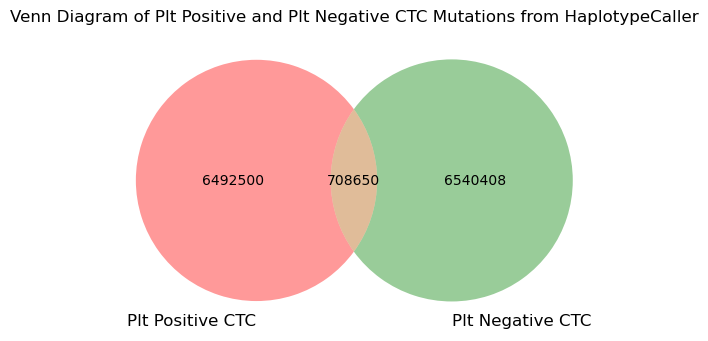

In [8]:
venn2([plt_pos_mutations, plt_neg_mutations], ('Plt Positive CTC', 'Plt Negative CTC'))
plt.title('Venn Diagram of Plt Positive and Plt Negative CTC Mutations from HaplotypeCaller')
plt.show()

In [9]:
exclusive_plt_pos = plt_pos_mutations - plt_neg_mutations
exclusive_plt_neg = plt_neg_mutations - plt_pos_mutations
common_mutations = plt_pos_mutations & plt_neg_mutations

In [10]:
print('Common Mutations:', len(common_mutations))
print('Exclusive Plt Pos:', len(exclusive_plt_pos))
print('Exclusive Plt Neg:', len(exclusive_plt_neg))

Common Mutations: 708650
Exclusive Plt Pos: 6492500
Exclusive Plt Neg: 6540408


In [11]:
exclusive_plt_pos_df = ctc_plt_pos[ctc_plt_pos['mutid'].isin(exclusive_plt_pos)]
print(exclusive_plt_pos_df.shape[0])
exclusive_plt_pos_df.head()

6492500


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid
0,chr10,3100339,.,A,G,44.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.476;DP=100;E...,GT:AD:DP:GQ:PL,"0/1:81,9:93:52:52,0,3127",chr10:3100339:A:G
1,chr10,3101136,.,TA,T,74.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.826;DP=38;Ex...,GT:AD:DP:GQ:PL,"0/1:30,7:38:82:82,0,868",chr10:3101136:TA:T
2,chr10,3101630,.,C,A,70.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-8.820e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:31,6:38:78:78,0,919",chr10:3101630:C:A
3,chr10,3101685,.,C,A,76.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-2.466e+00;DP=...,GT:AD:DP:GQ:PL,"0/1:28,6:37:84:84,0,1087",chr10:3101685:C:A
6,chr10,3103503,.,TTTTG,T,207.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-9.290e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:115,14:131:99:215,0,4608",chr10:3103503:TTTTG:T


In [12]:
exclusive_plt_neg_df = ctc_plt_neg[ctc_plt_neg['mutid'].isin(exclusive_plt_neg)]
print(exclusive_plt_neg_df.shape[0])
exclusive_plt_neg_df.head()

6540408


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid
0,chr10,3100482,.,A,ACCTCCAC,43.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;DP=14;Exc...,GT:AD:DP:GQ:PL,"0/1:11,2:13:51:51,0,429",chr10:3100482:A:ACCTCCAC
1,chr10,3101070,.,G,A,160.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;DP=17;Exc...,GT:AD:DP:GQ:PL,"0/1:5,8:13:99:168,0,119",chr10:3101070:G:A
2,chr10,3101242,.,TA,T,37.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-6.640e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:43,6:55:45:45,0,1475",chr10:3101242:TA:T
4,chr10,3103233,.,G,C,437.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=5.50;DP=345;Ex...,GT:AD:DP:GQ:PL,"0/1:302,34:339:99:445,0,12503",chr10:3103233:G:C
5,chr10,3103234,.,T,C,375.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=5.46;DP=340;Ex...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:303,32:336:99:0|1:3103234_T_C:383,0,12521:...",chr10:3103234:T:C


In [13]:
common_df = ctc_plt_pos[ctc_plt_pos['mutid'].isin(common_mutations)]
print(common_df.shape[0])
common_df.head()

708650


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid
4,chr10,3102600,.,C,CTCCACACTACCTCAA,47.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-7.670e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:71,7:81:55:55,0,3086",chr10:3102600:C:CTCCACACTACCTCAA
5,chr10,3103391,.,CT,C,51.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.147;DP=125;E...,GT:AD:DP:GQ:PL,"0/1:83,13:118:59:59,0,2697",chr10:3103391:CT:C
15,chr10,3108317,.,A,G,3334.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-4.560e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:104,117:221:99:3342,0,3071",chr10:3108317:A:G
20,chr10,3110293,.,T,A,121.84,.,AC=2;AF=1.00;AN=2;DP=11;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,3:3:9:1|1:3110293_T_A:135,9,0:3110293",chr10:3110293:T:A
22,chr10,3110436,.,G,C,166.14,.,AC=2;AF=1.00;AN=2;DP=4;ExcessHet=3.0103;FS=0.0...,GT:AD:DP:GQ:PL,"1/1:0,4:4:12:180,12,0",chr10:3110436:G:C


In [14]:
exclusive_plt_pos_df['genotype'] = exclusive_plt_pos_df['SAMPLE'].str.split(':').str[0]
exclusive_plt_neg_df['genotype'] = exclusive_plt_neg_df['SAMPLE'].str.split(':').str[0]
common_df['genotype'] = common_df['SAMPLE'].str.split(':').str[0]

/var/folders/1r/2rdl7f4j0jbbvz41q1pc2bv40000gp/T/ipykernel_25626/3487623727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exclusive_plt_pos_df['genotype'] = exclusive_plt_pos_df['SAMPLE'].str.split(':').str[0]
/var/folders/1r/2rdl7f4j0jbbvz41q1pc2bv40000gp/T/ipykernel_25626/3487623727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exclusive_plt_neg_df['genotype'] = exclusive_plt_neg_df['SAMPLE'].str.split(':').str[0]
/var/folders/1r/2rdl7f4j0jbbvz41q1pc2bv40000gp/T/ipykernel_25626/3487623727.py:3

In [15]:
exclusive_plt_pos_df['DP'] = exclusive_plt_pos_df['SAMPLE'].str.split(':').str[2].astype(float)
exclusive_plt_pos_df_filtered = exclusive_plt_pos_df[exclusive_plt_pos_df['DP'] > 10]
exclusive_plt_pos_df_filtered_snvs = exclusive_plt_pos_df_filtered[(exclusive_plt_pos_df_filtered['REF'].str.len() == 1) & (exclusive_plt_pos_df_filtered['ALT'].str.len() == 1)]
exclusive_plt_pos_df_filtered_snvs.head()

/var/folders/1r/2rdl7f4j0jbbvz41q1pc2bv40000gp/T/ipykernel_25626/3592849050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exclusive_plt_pos_df['DP'] = exclusive_plt_pos_df['SAMPLE'].str.split(':').str[2].astype(float)


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
0,chr10,3100339,.,A,G,44.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.476;DP=100;E...,GT:AD:DP:GQ:PL,"0/1:81,9:93:52:52,0,3127",chr10:3100339:A:G,0/1,93.0
2,chr10,3101630,.,C,A,70.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-8.820e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:31,6:38:78:78,0,919",chr10:3101630:C:A,0/1,38.0
3,chr10,3101685,.,C,A,76.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-2.466e+00;DP=...,GT:AD:DP:GQ:PL,"0/1:28,6:37:84:84,0,1087",chr10:3101685:C:A,0/1,37.0
9,chr10,3105474,.,T,G,152.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-2.440e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:102,14:121:99:160,0,3267",chr10:3105474:T:G,0/1,121.0
11,chr10,3106403,.,C,A,257.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.547e+00;DP=...,GT:AD:DP:GQ:PL,"0/1:11,10:21:99:265,0,328",chr10:3106403:C:A,0/1,21.0


In [16]:
exclusive_plt_neg_df['DP'] = exclusive_plt_neg_df['SAMPLE'].str.split(':').str[2].astype(float)
exclusive_plt_neg_df_filtered = exclusive_plt_neg_df[exclusive_plt_neg_df['DP'] > 10]
exclusive_plt_neg_df_filtered_snvs = exclusive_plt_neg_df_filtered[(exclusive_plt_neg_df_filtered['REF'].str.len() == 1) & (exclusive_plt_neg_df_filtered['ALT'].str.len() == 1)]
exclusive_plt_neg_df_filtered_snvs.head()

/var/folders/1r/2rdl7f4j0jbbvz41q1pc2bv40000gp/T/ipykernel_25626/595325619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exclusive_plt_neg_df['DP'] = exclusive_plt_neg_df['SAMPLE'].str.split(':').str[2].astype(float)


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
1,chr10,3101070,.,G,A,160.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;DP=17;Exc...,GT:AD:DP:GQ:PL,"0/1:5,8:13:99:168,0,119",chr10:3101070:G:A,0/1,13.0
4,chr10,3103233,.,G,C,437.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=5.50;DP=345;Ex...,GT:AD:DP:GQ:PL,"0/1:302,34:339:99:445,0,12503",chr10:3103233:G:C,0/1,339.0
5,chr10,3103234,.,T,C,375.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=5.46;DP=340;Ex...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:303,32:336:99:0|1:3103234_T_C:383,0,12521:...",chr10:3103234:T:C,0|1,336.0
6,chr10,3103235,.,G,A,378.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=5.41;DP=337;Ex...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:302,32:335:99:0|1:3103234_T_C:386,0,12500:...",chr10:3103235:G:A,0|1,335.0
7,chr10,3103237,.,T,A,320.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=3.31;DP=327;Ex...,GT:AD:DP:GQ:PL,"0/1:281,30:316:99:328,0,11606",chr10:3103237:T:A,0/1,316.0


In [17]:
common_df['DP'] = common_df['SAMPLE'].str.split(':').str[2].astype(float)
common_df_filtered = common_df[common_df['DP'] > 10]
common_df_filtered_snvs = common_df_filtered[(common_df_filtered['REF'].str.len() == 1) & (common_df_filtered['ALT'].str.len() == 1)]
common_df_filtered_snvs.head()

/var/folders/1r/2rdl7f4j0jbbvz41q1pc2bv40000gp/T/ipykernel_25626/465872635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_df['DP'] = common_df['SAMPLE'].str.split(':').str[2].astype(float)


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
15,chr10,3108317,.,A,G,3334.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-4.560e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:104,117:221:99:3342,0,3071",chr10:3108317:A:G,0/1,221.0
44,chr10,3123268,.,G,A,65.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.404;DP=33;Ex...,GT:AD:DP:GQ:PL,"0/1:24,6:32:73:73,0,878",chr10:3123268:G:A,0/1,32.0
45,chr10,3123496,.,G,T,3483.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-2.471e+00;DP=...,GT:AD:DP:GQ:PL,"0/1:431,160:593:99:3491,0,13714",chr10:3123496:G:T,0/1,593.0
60,chr10,3131835,.,A,C,348.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=2.49;DP=162;Ex...,GT:AD:DP:GQ:PL,"0/1:125,23:155:99:356,0,4581",chr10:3131835:A:C,0/1,155.0
73,chr10,3134033,.,G,T,442.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-2.470e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:4,11:15:99:0|1:3134033_G_T:450,0,135:3134033",chr10:3134033:G:T,0|1,15.0


In [18]:
exclusive_plt_pos_df_filtered_snvs.genotype.unique()

array(['0/1', '0|1', '1/1', '1|1'], dtype=object)

In [19]:
exclusive_plt_neg_df_filtered_snvs.genotype.unique()

array(['0/1', '0|1', '1|1', '1/1'], dtype=object)

In [20]:
common_df_filtered_snvs.genotype.unique()

array(['0/1', '0|1', '1|1', '1/1'], dtype=object)

#### Heterozygous

In [21]:
exclusive_plt_pos_df_filtered_snvs_heterozygous = exclusive_plt_pos_df_filtered_snvs[exclusive_plt_pos_df_filtered_snvs['genotype'].isin(['0/1', '0|1'])]
exclusive_plt_pos_df_filtered_snvs_heterozygous.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
0,chr10,3100339,.,A,G,44.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.476;DP=100;E...,GT:AD:DP:GQ:PL,"0/1:81,9:93:52:52,0,3127",chr10:3100339:A:G,0/1,93.0
2,chr10,3101630,.,C,A,70.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-8.820e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:31,6:38:78:78,0,919",chr10:3101630:C:A,0/1,38.0
3,chr10,3101685,.,C,A,76.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-2.466e+00;DP=...,GT:AD:DP:GQ:PL,"0/1:28,6:37:84:84,0,1087",chr10:3101685:C:A,0/1,37.0
9,chr10,3105474,.,T,G,152.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-2.440e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:102,14:121:99:160,0,3267",chr10:3105474:T:G,0/1,121.0
11,chr10,3106403,.,C,A,257.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.547e+00;DP=...,GT:AD:DP:GQ:PL,"0/1:11,10:21:99:265,0,328",chr10:3106403:C:A,0/1,21.0


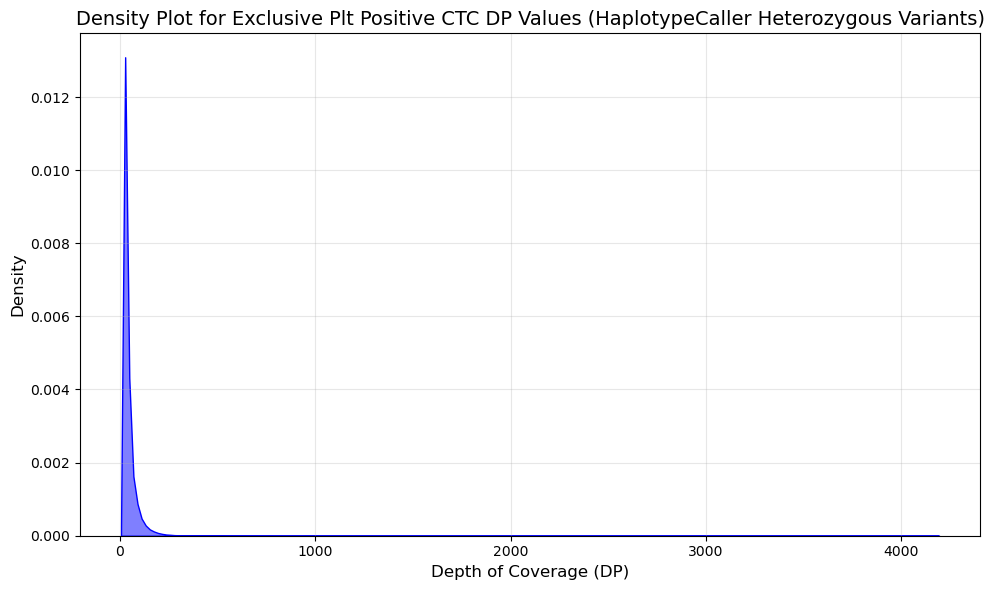

In [28]:
plt.figure(figsize=(10, 6))
sns.kdeplot(exclusive_plt_pos_df_filtered_snvs_heterozygous['DP'], fill=True, color="blue", alpha=0.5)
plt.title("Density Plot for Exclusive Plt Positive CTC DP Values (HaplotypeCaller Heterozygous Variants)", fontsize=14)
plt.xlabel("Depth of Coverage (DP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
exclusive_plt_pos_df_filtered_snvs_heterozygous.to_csv('./HaplotypeCaller/Plt/heterozygous/exclusive_plt_pos_df_filtered_snvs_heterozygous.csv', index=False)

In [24]:
exclusive_plt_neg_df_filtered_snvs_heterozygous = exclusive_plt_neg_df_filtered_snvs[exclusive_plt_neg_df_filtered_snvs['genotype'].isin(['0/1', '0|1'])]
exclusive_plt_neg_df_filtered_snvs_heterozygous.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
1,chr10,3101070,.,G,A,160.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;DP=17;Exc...,GT:AD:DP:GQ:PL,"0/1:5,8:13:99:168,0,119",chr10:3101070:G:A,0/1,13.0
4,chr10,3103233,.,G,C,437.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=5.50;DP=345;Ex...,GT:AD:DP:GQ:PL,"0/1:302,34:339:99:445,0,12503",chr10:3103233:G:C,0/1,339.0
5,chr10,3103234,.,T,C,375.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=5.46;DP=340;Ex...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:303,32:336:99:0|1:3103234_T_C:383,0,12521:...",chr10:3103234:T:C,0|1,336.0
6,chr10,3103235,.,G,A,378.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=5.41;DP=337;Ex...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:302,32:335:99:0|1:3103234_T_C:386,0,12500:...",chr10:3103235:G:A,0|1,335.0
7,chr10,3103237,.,T,A,320.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=3.31;DP=327;Ex...,GT:AD:DP:GQ:PL,"0/1:281,30:316:99:328,0,11606",chr10:3103237:T:A,0/1,316.0


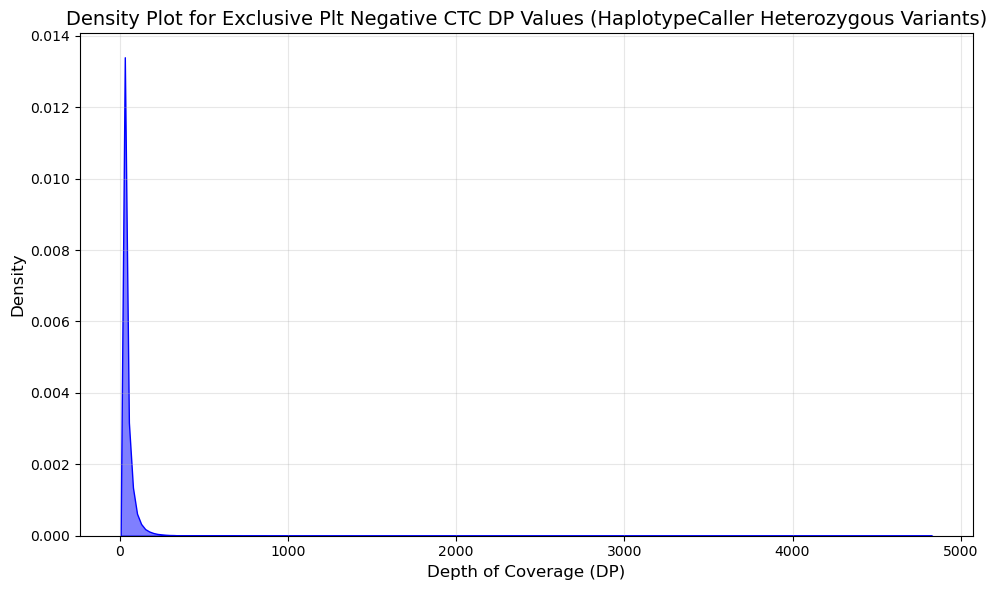

In [29]:
plt.figure(figsize=(10, 6))
sns.kdeplot(exclusive_plt_neg_df_filtered_snvs_heterozygous['DP'], fill=True, color="blue", alpha=0.5)
plt.title("Density Plot for Exclusive Plt Negative CTC DP Values (HaplotypeCaller Heterozygous Variants)", fontsize=14)
plt.xlabel("Depth of Coverage (DP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
exclusive_plt_neg_df_filtered_snvs_heterozygous.to_csv('./HaplotypeCaller/Plt/heterozygous/exclusive_plt_neg_df_filtered_snvs_heterozygous.csv', index=False)

In [27]:
common_df_filtered_snvs_heterozygous = common_df_filtered_snvs[common_df_filtered_snvs['genotype'].isin(['0/1', '0|1'])]
common_df_filtered_snvs_heterozygous.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
15,chr10,3108317,.,A,G,3334.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-4.560e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:104,117:221:99:3342,0,3071",chr10:3108317:A:G,0/1,221.0
44,chr10,3123268,.,G,A,65.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.404;DP=33;Ex...,GT:AD:DP:GQ:PL,"0/1:24,6:32:73:73,0,878",chr10:3123268:G:A,0/1,32.0
45,chr10,3123496,.,G,T,3483.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-2.471e+00;DP=...,GT:AD:DP:GQ:PL,"0/1:431,160:593:99:3491,0,13714",chr10:3123496:G:T,0/1,593.0
60,chr10,3131835,.,A,C,348.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=2.49;DP=162;Ex...,GT:AD:DP:GQ:PL,"0/1:125,23:155:99:356,0,4581",chr10:3131835:A:C,0/1,155.0
73,chr10,3134033,.,G,T,442.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-2.470e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:4,11:15:99:0|1:3134033_G_T:450,0,135:3134033",chr10:3134033:G:T,0|1,15.0


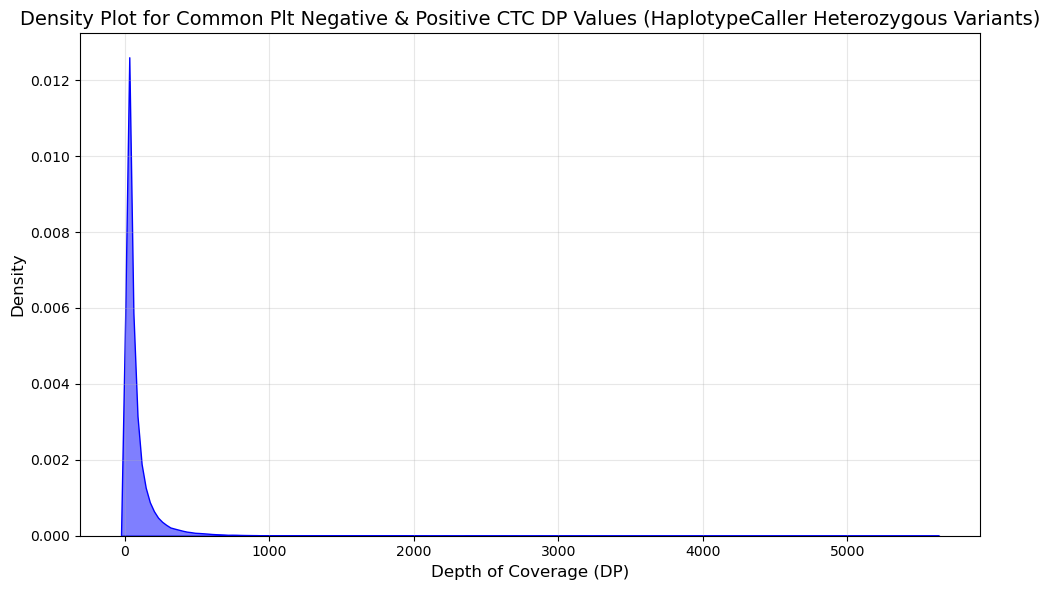

In [30]:
plt.figure(figsize=(10, 6))
sns.kdeplot(common_df_filtered_snvs_heterozygous['DP'], fill=True, color="blue", alpha=0.5)
plt.title("Density Plot for Common Plt Negative & Positive CTC DP Values (HaplotypeCaller Heterozygous Variants)", fontsize=14)
plt.xlabel("Depth of Coverage (DP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

In [31]:
common_df_filtered_snvs_heterozygous.to_csv('./HaplotypeCaller/Plt/heterozygous/common_df_filtered_snvs_heterozygous.csv', index=False)

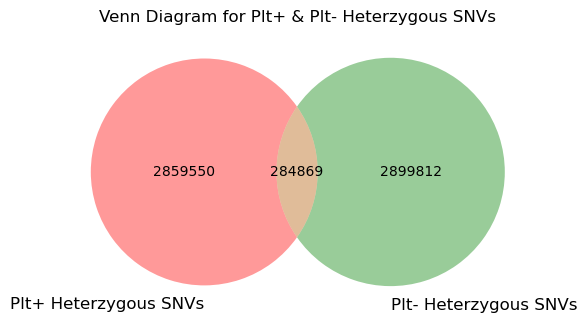

In [43]:
common_plt = common_df_filtered_snvs_heterozygous['mutid'].tolist()
exclusive_plt_pos = exclusive_plt_pos_df_filtered_snvs_heterozygous['mutid'].tolist()
exclusive_plt_neg = exclusive_plt_neg_df_filtered_snvs_heterozygous['mutid'].tolist()

plt_pos_mutations_snvs_heterozygous = set(common_plt).union(set(exclusive_plt_pos))
plt_neg_mutations_snvs_heterozygous = set(common_plt).union(set(exclusive_plt_neg))

plt.figure(figsize=(6, 6))
venn2([plt_pos_mutations_snvs_heterozygous, plt_neg_mutations_snvs_heterozygous], set_labels=('Plt+ Heterzygous SNVs', 'Plt- Heterzygous SNVs'))
plt.title("Venn Diagram for Plt+ & Plt- Heterzygous SNVs")
plt.tight_layout()
plt.show()

#### Homozygous

In [32]:
exclusive_plt_pos_df_filtered_snvs_homozygous = exclusive_plt_pos_df_filtered_snvs[exclusive_plt_pos_df_filtered_snvs['genotype'].isin(['1/1', '1|1'])]
exclusive_plt_pos_df_filtered_snvs_homozygous.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
4022,chr10,4526091,.,C,A,576.06,.,AC=2;AF=1.00;AN=2;DP=17;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,15:16:45:590,45,0",chr10:4526091:C:A,1/1,16.0
8483,chr10,6077013,.,C,A,2591.05,.,AC=2;AF=1.00;AN=2;BaseQRankSum=3.58;DP=78;Exce...,GT:AD:DP:GQ:PL,"1/1:6,70:77:53:2740,53,0",chr10:6077013:C:A,1/1,77.0
8487,chr10,6077028,.,C,A,1336.06,.,AC=2;AF=1.00;AN=2;BaseQRankSum=0.00;DP=32;Exce...,GT:AD:DP:GQ:PL,"1/1:1,31:32:51:1350,51,0",chr10:6077028:C:A,1/1,32.0
47561,chr10,20208700,.,A,G,695.06,.,AC=2;AF=1.00;AN=2;DP=18;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,18:18:54:709,54,0",chr10:20208700:A:G,1/1,18.0
52425,chr10,21991649,.,C,A,1011.06,.,AC=2;AF=1.00;AN=2;DP=23;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,23:23:69:1|1:21991646_C_CACA:1025,69,0:2...",chr10:21991649:C:A,1|1,23.0


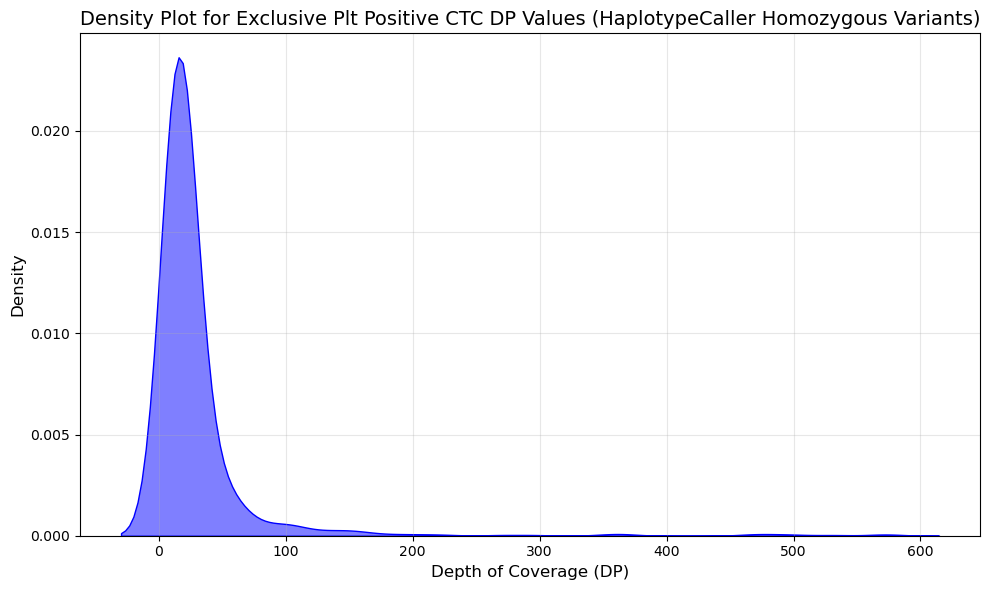

In [33]:
plt.figure(figsize=(10, 6))
sns.kdeplot(exclusive_plt_pos_df_filtered_snvs_homozygous['DP'], fill=True, color="blue", alpha=0.5)
plt.title("Density Plot for Exclusive Plt Positive CTC DP Values (HaplotypeCaller Homozygous Variants)", fontsize=14)
plt.xlabel("Depth of Coverage (DP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
exclusive_plt_pos_df_filtered_snvs_homozygous.to_csv('./HaplotypeCaller/Plt/homozygous/exclusive_plt_pos_df_filtered_snvs_homozygous.csv', index=False)

In [35]:
exclusive_plt_neg_df_filtered_snvs_homozygous = exclusive_plt_neg_df_filtered_snvs[exclusive_plt_neg_df_filtered_snvs['genotype'].isin(['1/1', '1|1'])]
exclusive_plt_neg_df_filtered_snvs_homozygous.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
3192,chr10,4241348,.,G,T,496.30,.,AC=2;AF=1.00;AN=2;BaseQRankSum=0.491;DP=21;Exc...,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:2,12:21:11:1|1:4241346_G_T:510,11,0:4241346",chr10:4241348:G:T,1|1,21.0
4392,chr10,4647359,.,C,T,1095.09,.,AC=2;AF=1.00;AN=2;DP=28;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,25:28:78:1093,78,0",chr10:4647359:C:T,1/1,28.0
4393,chr10,4647362,.,C,A,1037.18,.,AC=2;AF=1.00;AN=2;DP=26;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,24:26:72:1040,72,0",chr10:4647362:C:A,1/1,26.0
7483,chr10,5799078,.,C,A,190.96,.,AC=2;AF=1.00;AN=2;DP=16;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,5:16:15:1|1:5799078_C_A:205,15,0:5799078",chr10:5799078:C:A,1|1,16.0
7484,chr10,5799093,.,C,A,190.96,.,AC=2;AF=1.00;AN=2;DP=16;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,5:16:15:1|1:5799078_C_A:205,15,0:5799078",chr10:5799093:C:A,1|1,16.0


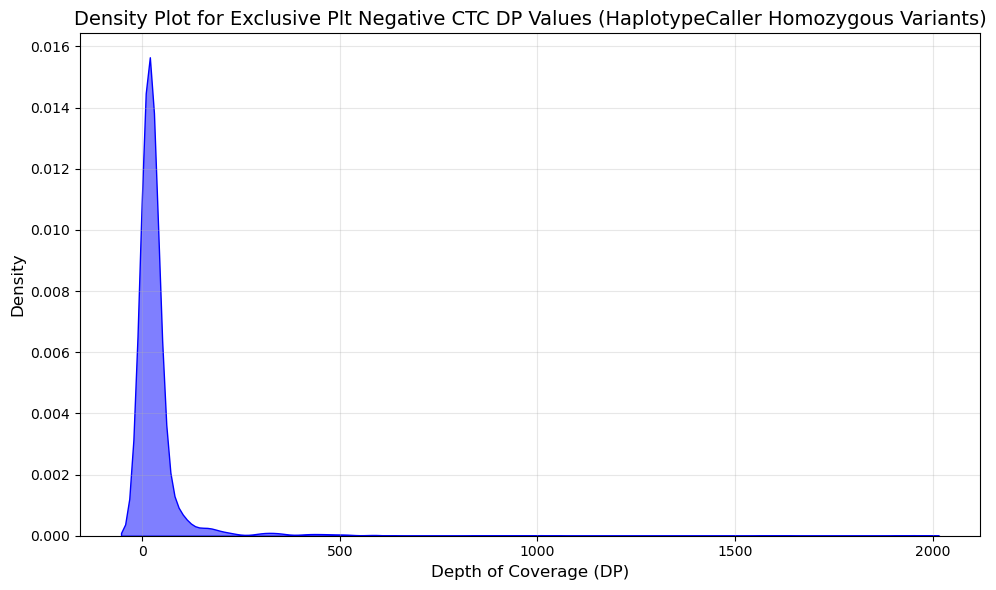

In [39]:
plt.figure(figsize=(10, 6))
sns.kdeplot(exclusive_plt_neg_df_filtered_snvs_homozygous['DP'], fill=True, color="blue", alpha=0.5)
plt.title("Density Plot for Exclusive Plt Negative CTC DP Values (HaplotypeCaller Homozygous Variants)", fontsize=14)
plt.xlabel("Depth of Coverage (DP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

In [37]:
exclusive_plt_neg_df_filtered_snvs_homozygous.to_csv('./HaplotypeCaller/Plt/homozygous/exclusive_plt_neg_df_filtered_snvs_homozygous.csv', index=False)

In [38]:
common_df_filtered_snvs_homozygous = common_df_filtered_snvs[common_df_filtered_snvs['genotype'].isin(['1/1', '1|1'])]
common_df_filtered_snvs_homozygous.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
416,chr10,3232360,.,C,T,1156.06,.,AC=2;AF=1.00;AN=2;BaseQRankSum=-6.630e-01;DP=5...,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:1,27:57:39:1|1:3232333_C_T:1170,39,0:3232333",chr10:3232360:C:T,1|1,57.0
417,chr10,3232367,.,C,T,1271.84,.,AC=2;AF=1.00;AN=2;BaseQRankSum=-8.240e-01;DP=6...,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:2,31:64:9:1|1:3232333_C_T:1285,9,0:3232333",chr10:3232367:C:T,1|1,64.0
418,chr10,3232369,.,A,C,1305.14,.,AC=2;AF=1.00;AN=2;BaseQRankSum=-8.670e-01;DP=7...,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:2,32:70:12:1|1:3232333_C_T:1319,12,0:3232333",chr10:3232369:A:C,1|1,70.0
421,chr10,3232442,.,A,T,1530.31,.,AC=2;AF=1.00;AN=2;BaseQRankSum=3.00;DP=100;Exc...,GT:AD:DP:GQ:PL,"1/1:6,51:100:2:1539,2,0",chr10:3232442:A:T,1/1,100.0
437,chr10,3234656,.,G,T,1861.04,.,AC=2;AF=1.00;AN=2;BaseQRankSum=0.129;DP=66;Exc...,GT:AD:DP:GQ:PL,"1/1:6,57:63:25:1875,25,0",chr10:3234656:G:T,1/1,63.0


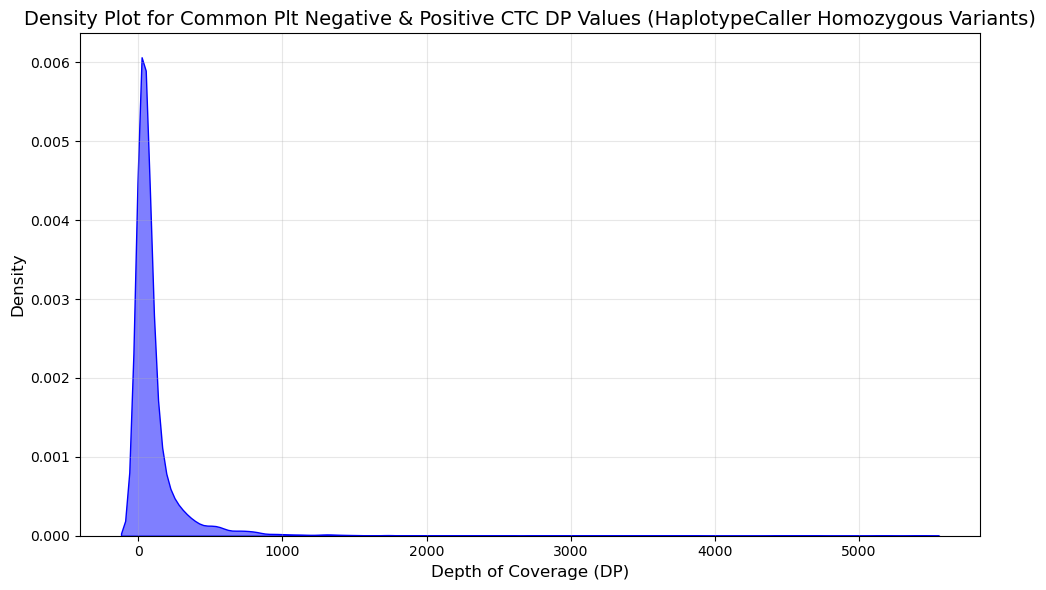

In [40]:
plt.figure(figsize=(10, 6))
sns.kdeplot(common_df_filtered_snvs_homozygous['DP'], fill=True, color="blue", alpha=0.5)
plt.title("Density Plot for Common Plt Negative & Positive CTC DP Values (HaplotypeCaller Homozygous Variants)", fontsize=14)
plt.xlabel("Depth of Coverage (DP)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

In [41]:
common_df_filtered_snvs_homozygous.to_csv('./HaplotypeCaller/Plt/homozygous/common_df_filtered_snvs_homozygous.csv', index=False)

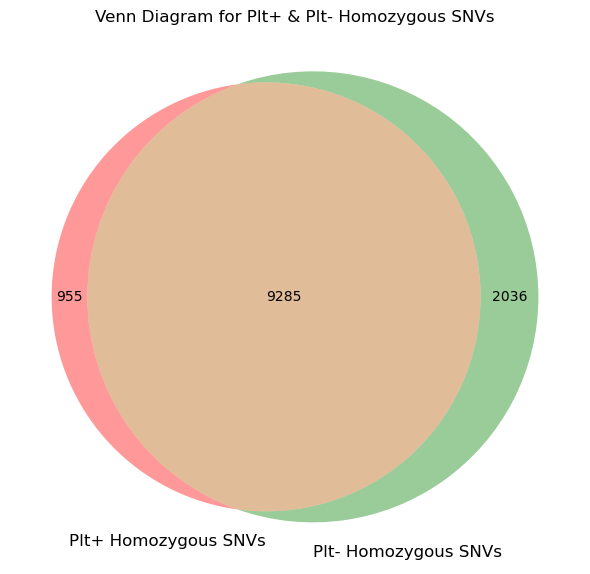

In [44]:
common_plt = common_df_filtered_snvs_homozygous['mutid'].tolist()
exclusive_plt_pos = exclusive_plt_pos_df_filtered_snvs_homozygous['mutid'].tolist()
exclusive_plt_neg = exclusive_plt_neg_df_filtered_snvs_homozygous['mutid'].tolist()

plt_pos_mutations_snvs_homozygous = set(common_plt).union(set(exclusive_plt_pos))
plt_neg_mutations_snvs_homozygous = set(common_plt).union(set(exclusive_plt_neg))

plt.figure(figsize=(6, 6))
venn2([plt_pos_mutations_snvs_homozygous, plt_neg_mutations_snvs_homozygous], set_labels=('Plt+ Homozygous SNVs', 'Plt- Homozygous SNVs'))
plt.title("Venn Diagram for Plt+ & Plt- Homozygous SNVs")
plt.tight_layout()
plt.show()